In [1]:
import os

# ==============================================================================
# Must set R path BEFORE importing rpy2!
# ==============================================================================
# Your Conda R environment path (please ensure this path is correct)
conda_env_path = "/home/hice1/kyan66/scratch/r_kernel"

# 1. Set R_HOME (tell Python where R's home directory is)
os.environ['R_HOME'] = f"{conda_env_path}/lib/R"

# 2. Set PATH (tell Python where R's executable commands are)
os.environ['PATH'] = f"{conda_env_path}/bin:" + os.environ.get('PATH', '')

# 3. Set LD_LIBRARY_PATH (tell Python where R's dynamic libraries are)
os.environ['LD_LIBRARY_PATH'] = f"{conda_env_path}/lib:" + os.environ.get('LD_LIBRARY_PATH', '')

print(f"✅ R environment path configured: {os.environ['R_HOME']}")

✅ R environment path configured: /home/hice1/kyan66/scratch/r_kernel/lib/R


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import random

In [3]:
import torch
import socket

print(f"Current hostname: {socket.gethostname()}")
print(f"Is CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
    print("🎉 Congratulations! Your uv environment successfully accessed the compute node's GPU!")
else:
    print("❌ GPU not detected. Please check the salloc command.")

Current hostname: atl1-1-01-005-2-1.pace.gatech.edu
Is CUDA available: False
❌ GPU not detected. Please check the salloc command.


In [4]:
save_dir = '../data/ssusa'
os.makedirs(save_dir, exist_ok=True)

# Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

In [5]:
# Define the directory path
data_dir = save_dir
df_path = data_dir + r'/cleaned_snapshot_usa_iucn.csv'


In [6]:
df = pd.read_csv(df_path)

/tmp/ipykernel_2927424/2810494364.py:1: DtypeWarning: Columns (0: Sequence_ID) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df_path)


In [7]:
df.head(10)

,Year,Project,Camera_Trap_Array,Deployment_ID,Sequence_ID,Start_Time,End_Time,Class,Order,Family,Genus,Species,Common_Name,Sci_Name,Age,Sex,Group_Size,Site_Name,Start_Date,End_Date,Survey_Nights,Latitude,Longitude,Habitat,Development_Level,Feature_Type
0,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s1,2019-08-31 06:50:00,2019-08-31 06:50:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
1,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s2,2019-08-31 14:15:00,2019-08-31 14:17:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
2,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s3,2019-08-31 18:22:00,2019-08-31 18:22:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
3,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,adult,female,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
4,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,juvenile,unknown,2,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
5,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s5,2019-09-02 19:18:00,2019-09-02 19:18:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
6,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s6,2019-09-02 19:57:00,2019-09-02 19:57:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
7,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s7,2019-09-02 21:44:00,2019-09-02 21:44:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
8,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s8,2019-09-02 23:44:00,2019-09-02 23:44:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
9,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s9,2019-09-03 06:55:00,2019-09-03 06:55:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source


In [8]:
# Generate species observation summary
# Group by scientific name and common name, count observations
species_summary = df.groupby(['Sci_Name', 'Common_Name']).size().reset_index(name='Number_of_Observations')

# Sort by number of observations in descending order
species_summary = species_summary.sort_values('Number_of_Observations', ascending=False)

# Save to CSV
# output_path = os.path.join(save_dir, 'species_observation_summary.csv')
# species_summary.to_csv(output_path, index=False)

# print(f"✅ Species observation summary saved to: {output_path}")
print(f"\nTotal unique species: {len(species_summary)}")
print(f"Total observations: {species_summary['Number_of_Observations'].sum()}")
print(f"\nTop 10 species by observations:")
print(species_summary.head(10).to_string(index=False))


Total unique species: 113
Total observations: 698887

Top 10 species by observations:
              Sci_Name           Common_Name  Number_of_Observations
odocoileus virginianus     white-tailed deer                  227780
  sciurus carolinensis eastern gray squirrel                  182314
         procyon lotor      northern raccoon                   78186
         sciurus niger  eastern fox squirrel                   34867
         canis latrans                coyote                   20149
  didelphis virginiana      virginia opossum                   18801
   odocoileus hemionus             mule deer                   18755
       tamias striatus      eastern chipmunk                   17668
 sylvilagus floridanus    eastern cottontail                   15709
         vulpes vulpes               red fox                   11390


In [9]:
def get_species_matrix(df, unit_col, species_col='Sci_Name'):
    """
    Converts dataframe to a presence/absence matrix (Sampling Unit x Species).
    
    Parameters:
    - df: pandas DataFrame containing the data
    - unit_col: column name for sampling unit (can be Site, Year, Location, Year_Month, etc.)
    - species_col: column name for species identification (default: 'Sci_Name')
    
    Returns:
    - Binary matrix where rows are sampling units and columns are species (1=present, 0=absent)
    """
    # Filter valid species and sampling units
    valid_data = df.dropna(subset=[species_col, unit_col])
    valid_data = valid_data[valid_data[species_col] != ""]

    # Create pivot table (Count occurrences)
    matrix = pd.crosstab(valid_data[unit_col], valid_data[species_col])

    # Convert to binary Presence/Absence (1/0)
    matrix = (matrix > 0).astype(int)

    return matrix

In [10]:
def species_accumulation(matrix, method='exact', permutations=100, 
                         conditioned=True, gamma='jack1', w=None):
    """
    Uses R's vegan::specaccum function for species accumulation.
    
    Parameters:
    - matrix: binary pandas DataFrame (Rows=Samples, Cols=Species)
    - method: Species accumulation method (partial match supported):
        * 'collector' - adds sites in the order they appear in the data
        * 'random' - adds sites in random order (uses permutations)
        * 'exact' - expected (mean) species richness using sample-based rarefaction (Mao Tau)
        * 'coleman' - expected richness following Coleman et al. 1982
        * 'rarefaction' - mean when accumulating individuals instead of sites
    - permutations: number of permutations for method='random' (default: 100)
    - conditioned: if True (default), SD for 'exact' method is conditional on empirical data
    - gamma: method for estimating total extrapolated species ('jack1', 'jack2', 'chao', 'boot')
             used for unconditional SD estimation in 'exact' method
    - w: optional weights giving sampling effort for each site (for 'random' and 'collector')

    Returns:
    - dict containing:
        * 'sites': number of sites (x-axis)
        * 'richness': species richness at each site count (y-axis)
        * 'sd': standard deviation (None for 'collector' method)
        * 'method': the method used
        * 'perm': permutation matrix (only for 'random' method, else None)
        * 'individuals': average individuals per site (only for 'rarefaction', else None)
        * 'effort': accumulated effort (only when weights used, else None)
    """
    
    # Load vegan package
    vegan = importr('vegan')
    
    # Convert pandas DataFrame to R data frame
    with localconverter(pandas2ri.converter + robjects.default_converter):
        r_matrix = pandas2ri.py2rpy(matrix)
        
        # Build keyword arguments
        kwargs = {
            'method': method,
            'permutations': permutations,
            'conditioned': conditioned,
            'gamma': gamma
        }
        
        # Add weights if provided
        if w is not None:
            kwargs['w'] = robjects.FloatVector(w)
        
        # Call vegan::specaccum
        result = vegan.specaccum(r_matrix, **kwargs)
    
    # Extract results from R object
    with localconverter(pandas2ri.converter + robjects.default_converter):
        sites = np.array(robjects.r('as.numeric')(result.rx2('sites')))
        richness = np.array(robjects.r('as.numeric')(result.rx2('richness')))
        
        # SD is NULL for 'collector' method
        try:
            sd_val = result.rx2('sd')
            if sd_val != robjects.NULL:
                sd = np.array(robjects.r('as.numeric')(sd_val))
            else:
                sd = np.zeros_like(richness)
        except:
            sd = np.zeros_like(richness)
        
        # Extract permutation matrix for 'random' method
        try:
            perm_val = result.rx2('perm')
            if perm_val != robjects.NULL:
                perm = np.array(perm_val)
            else:
                perm = None
        except:
            perm = None
        
        # Extract individuals for 'rarefaction' method
        try:
            ind_val = result.rx2('individuals')
            if ind_val != robjects.NULL:
                individuals = np.array(robjects.r('as.numeric')(ind_val))
            else:
                individuals = None
        except:
            individuals = None
        
        # Extract effort when weights are used
        try:
            eff_val = result.rx2('effort')
            if eff_val != robjects.NULL:
                effort = np.array(robjects.r('as.numeric')(eff_val))
            else:
                effort = None
        except:
            effort = None
    
    return {
        'sites': sites,
        'richness': richness,
        'sd': sd,
        'method': method,
        'perm': perm,
        'individuals': individuals,
        'effort': effort
    }


In [11]:
def plot_sac(sac_data, title, xlabel="Sampling units"):
    """Publication-quality plotting function for species accumulation curves"""
    x = sac_data['sites']
    y = sac_data['richness']
    sd = sac_data['sd']

    # Create figure with higher DPI for publication quality
    _fig, ax = plt.subplots(figsize=(10, 7), dpi=300)
    
    # Set style for publication
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Plot Confidence Interval (Mean +/- 2 SD approx 95% CI)
    if sd is not None and np.any(sd > 0):
        ax.fill_between(x, y - 2*sd, y + 2*sd, 
                        color='#2E86AB', alpha=0.2, 
                        label='95% Confidence Interval',
                        edgecolor='#2E86AB', linewidth=0.5)
    
    # Plot Mean Line with markers
    ax.plot(x, y, color='#A23B72', linewidth=2.5, 
            marker='o', markersize=6, markerfacecolor='white',
            markeredgewidth=2, markeredgecolor='#A23B72',
            label='Species Richness', zorder=3)
    
    # Enhance grid
    ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.8)
    ax.set_axisbelow(True)
    
    # Labels and title with better formatting
    ax.set_xlabel(xlabel, fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel("Accumulated Species Richness", fontsize=14, fontweight='bold', labelpad=10)
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Improve tick labels
    ax.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5)
    
    # Add legend with better formatting
    ax.legend(loc='lower right', frameon=True, fancybox=True, 
             shadow=True, fontsize=11, framealpha=0.95)
    
    # Set spine width
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    
    # Tight layout for better spacing
    plt.tight_layout()
    plt.show()

In [12]:
# Ensure Year is integer (handle NaNs if necessary)
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

# Extract Arrays with 5 years of data
# R logic: group by Array, get unique years, count them
years_per_array = df[df['Camera_Trap_Array'].notna()].groupby('Camera_Trap_Array')['Year'].unique()
arrays_5_years = years_per_array[years_per_array.apply(len) == 5].index.tolist()

print(f"Found {len(arrays_5_years)} arrays with 5 years of data.")

# Filter main dataframe
df_arrays_5_years = df[df['Camera_Trap_Array'].isin(arrays_5_years)].copy()

# Add Month Column from End_Date
df_arrays_5_years['End_Date'] = pd.to_datetime(df_arrays_5_years['End_Date'])
df_arrays_5_years['Month'] = df_arrays_5_years['End_Date'].dt.strftime('%m')

print(df_arrays_5_years[['Camera_Trap_Array', 'Year', 'Month']].head())

Found 41 arrays with 5 years of data.
  Camera_Trap_Array  Year Month
0             Crupi  2019    11
1             Crupi  2019    11
2             Crupi  2019    11
3             Crupi  2019    11
4             Crupi  2019    11


Selected Camera_Trap_Array: Herrera
Matrix shape: (5, 17)


R callback write-console: 'nperm' >= set of all permutations: complete enumeration.
  
R callback write-console: Set of permutations < 'minperm'. Generating entire set.
  


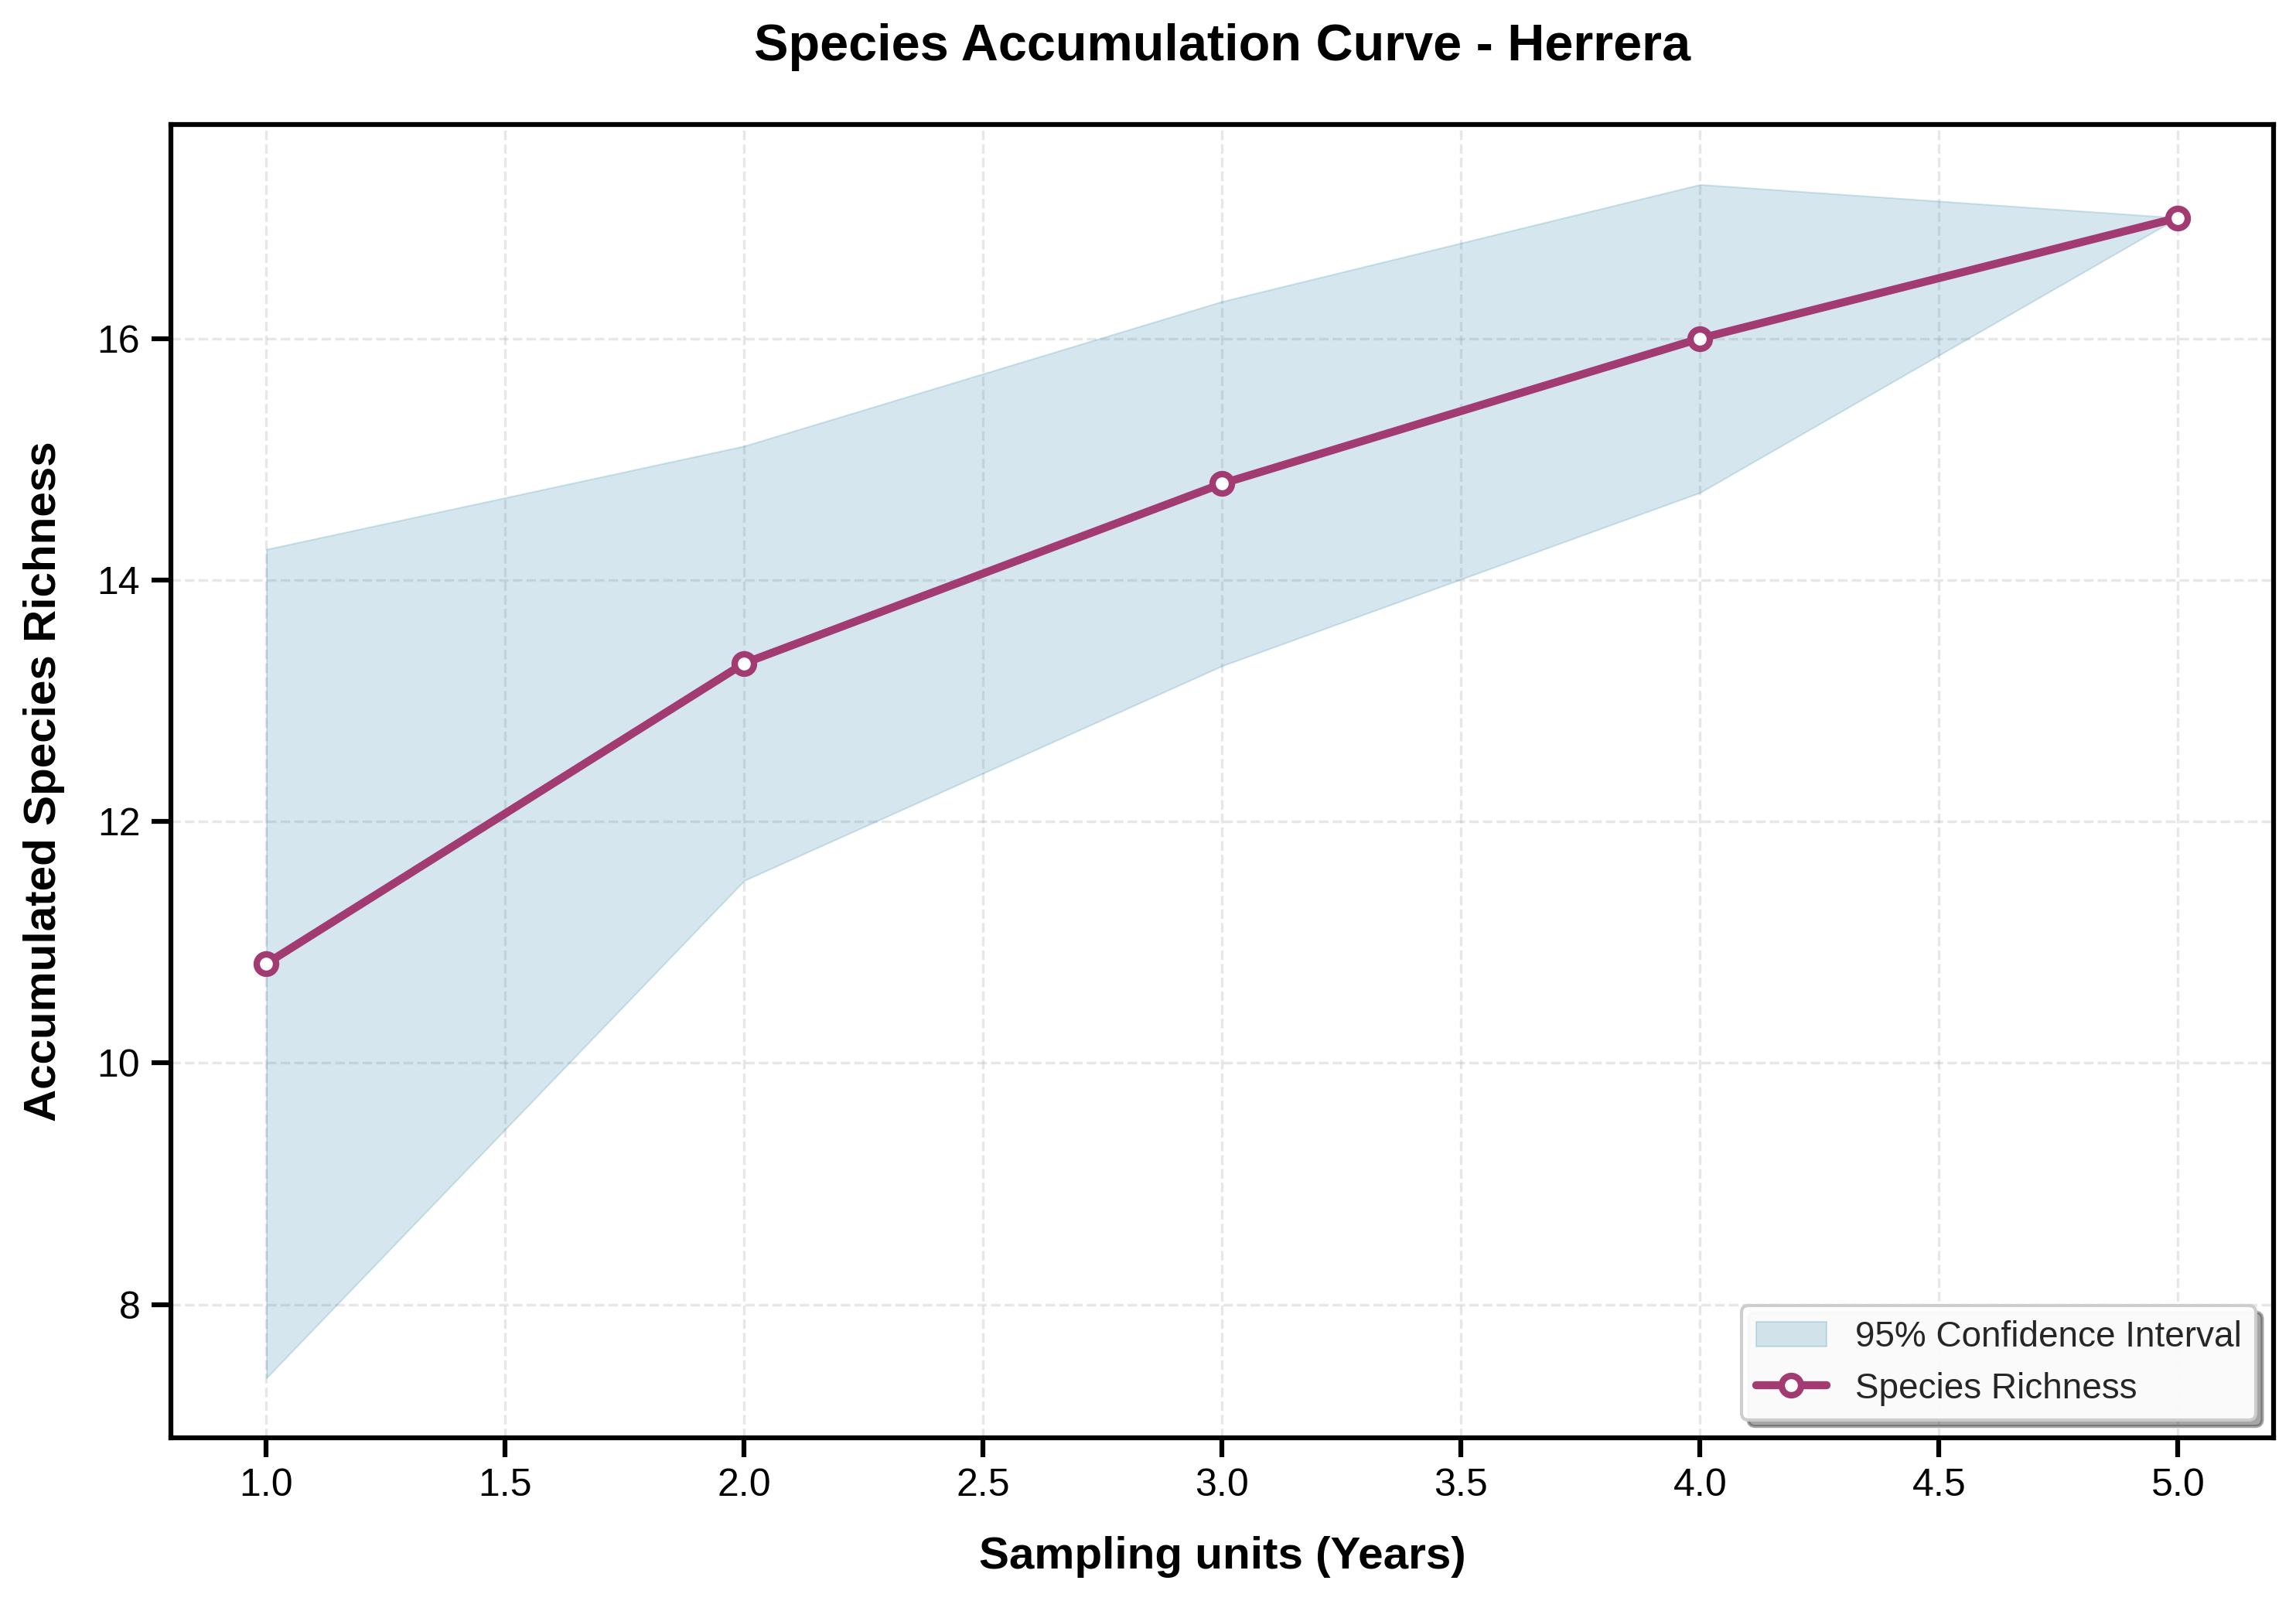

Observed richness: 17.0


In [13]:
# select array with most records (or manual selection)
selected_array = df_arrays_5_years['Camera_Trap_Array'].value_counts().idxmax()
# selected_array = "Herrera" # Manual override if needed

print(f"Selected Camera_Trap_Array: {selected_array}")

# Subset data
df_array = df_arrays_5_years[df_arrays_5_years['Camera_Trap_Array'] == selected_array]

# Create Matrix: Site = Year, Species = Sci_Name
# Note: In the R code, rows were Years.
mat_year = get_species_matrix(df_array, unit_col='Year', species_col='Sci_Name')

# Sort by index (Year) for consistent 'collector' plotting later
mat_year = mat_year.sort_index()

print(f"Matrix shape: {mat_year.shape}")

# Calculate Randomized Accumulation
acc_rand_year = species_accumulation(mat_year, method='random', permutations=1000)

# Plot
plot_sac(acc_rand_year,
         title=f"Species Accumulation Curve - {selected_array}",
         xlabel="Sampling units (Years)")

print(f"Observed richness: {acc_rand_year['richness'][-1]}")

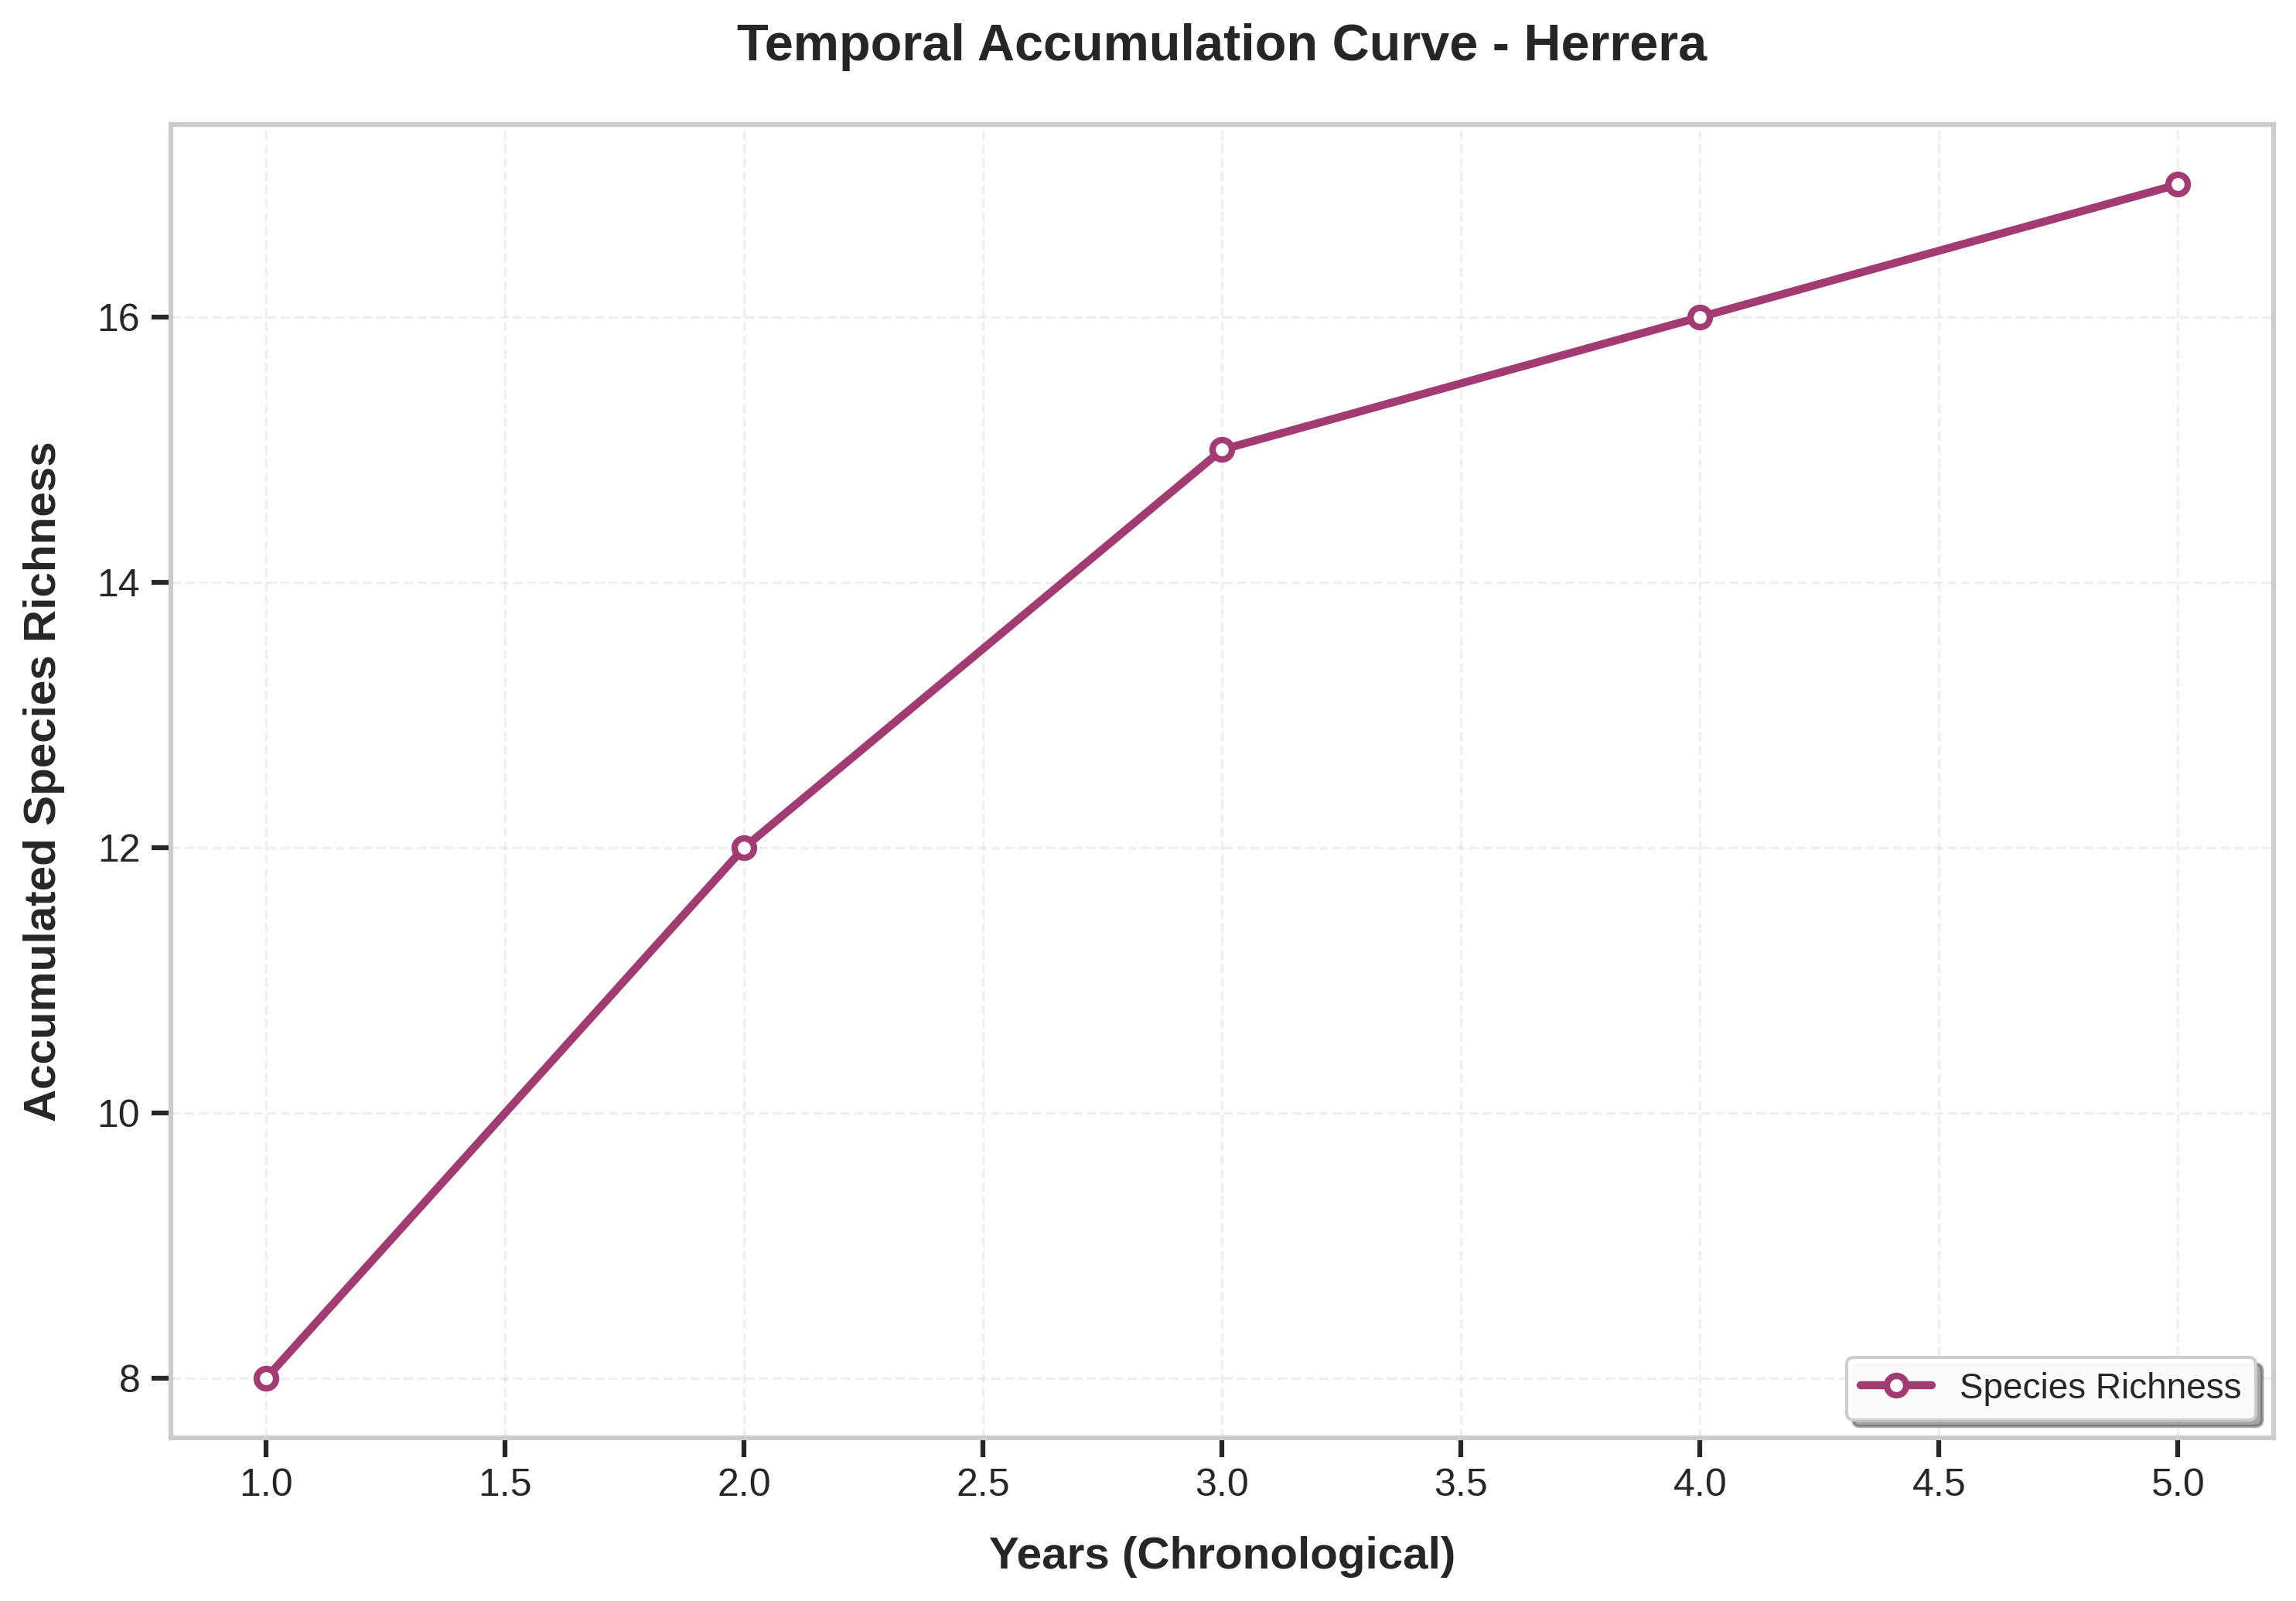

In [14]:
# Calculate Collector Accumulation
acc_col_year = species_accumulation(mat_year, method='collector')

# Plot
plot_sac(acc_col_year,
         title=f"Temporal Accumulation Curve - {selected_array}",
         xlabel="Years (Chronological)")

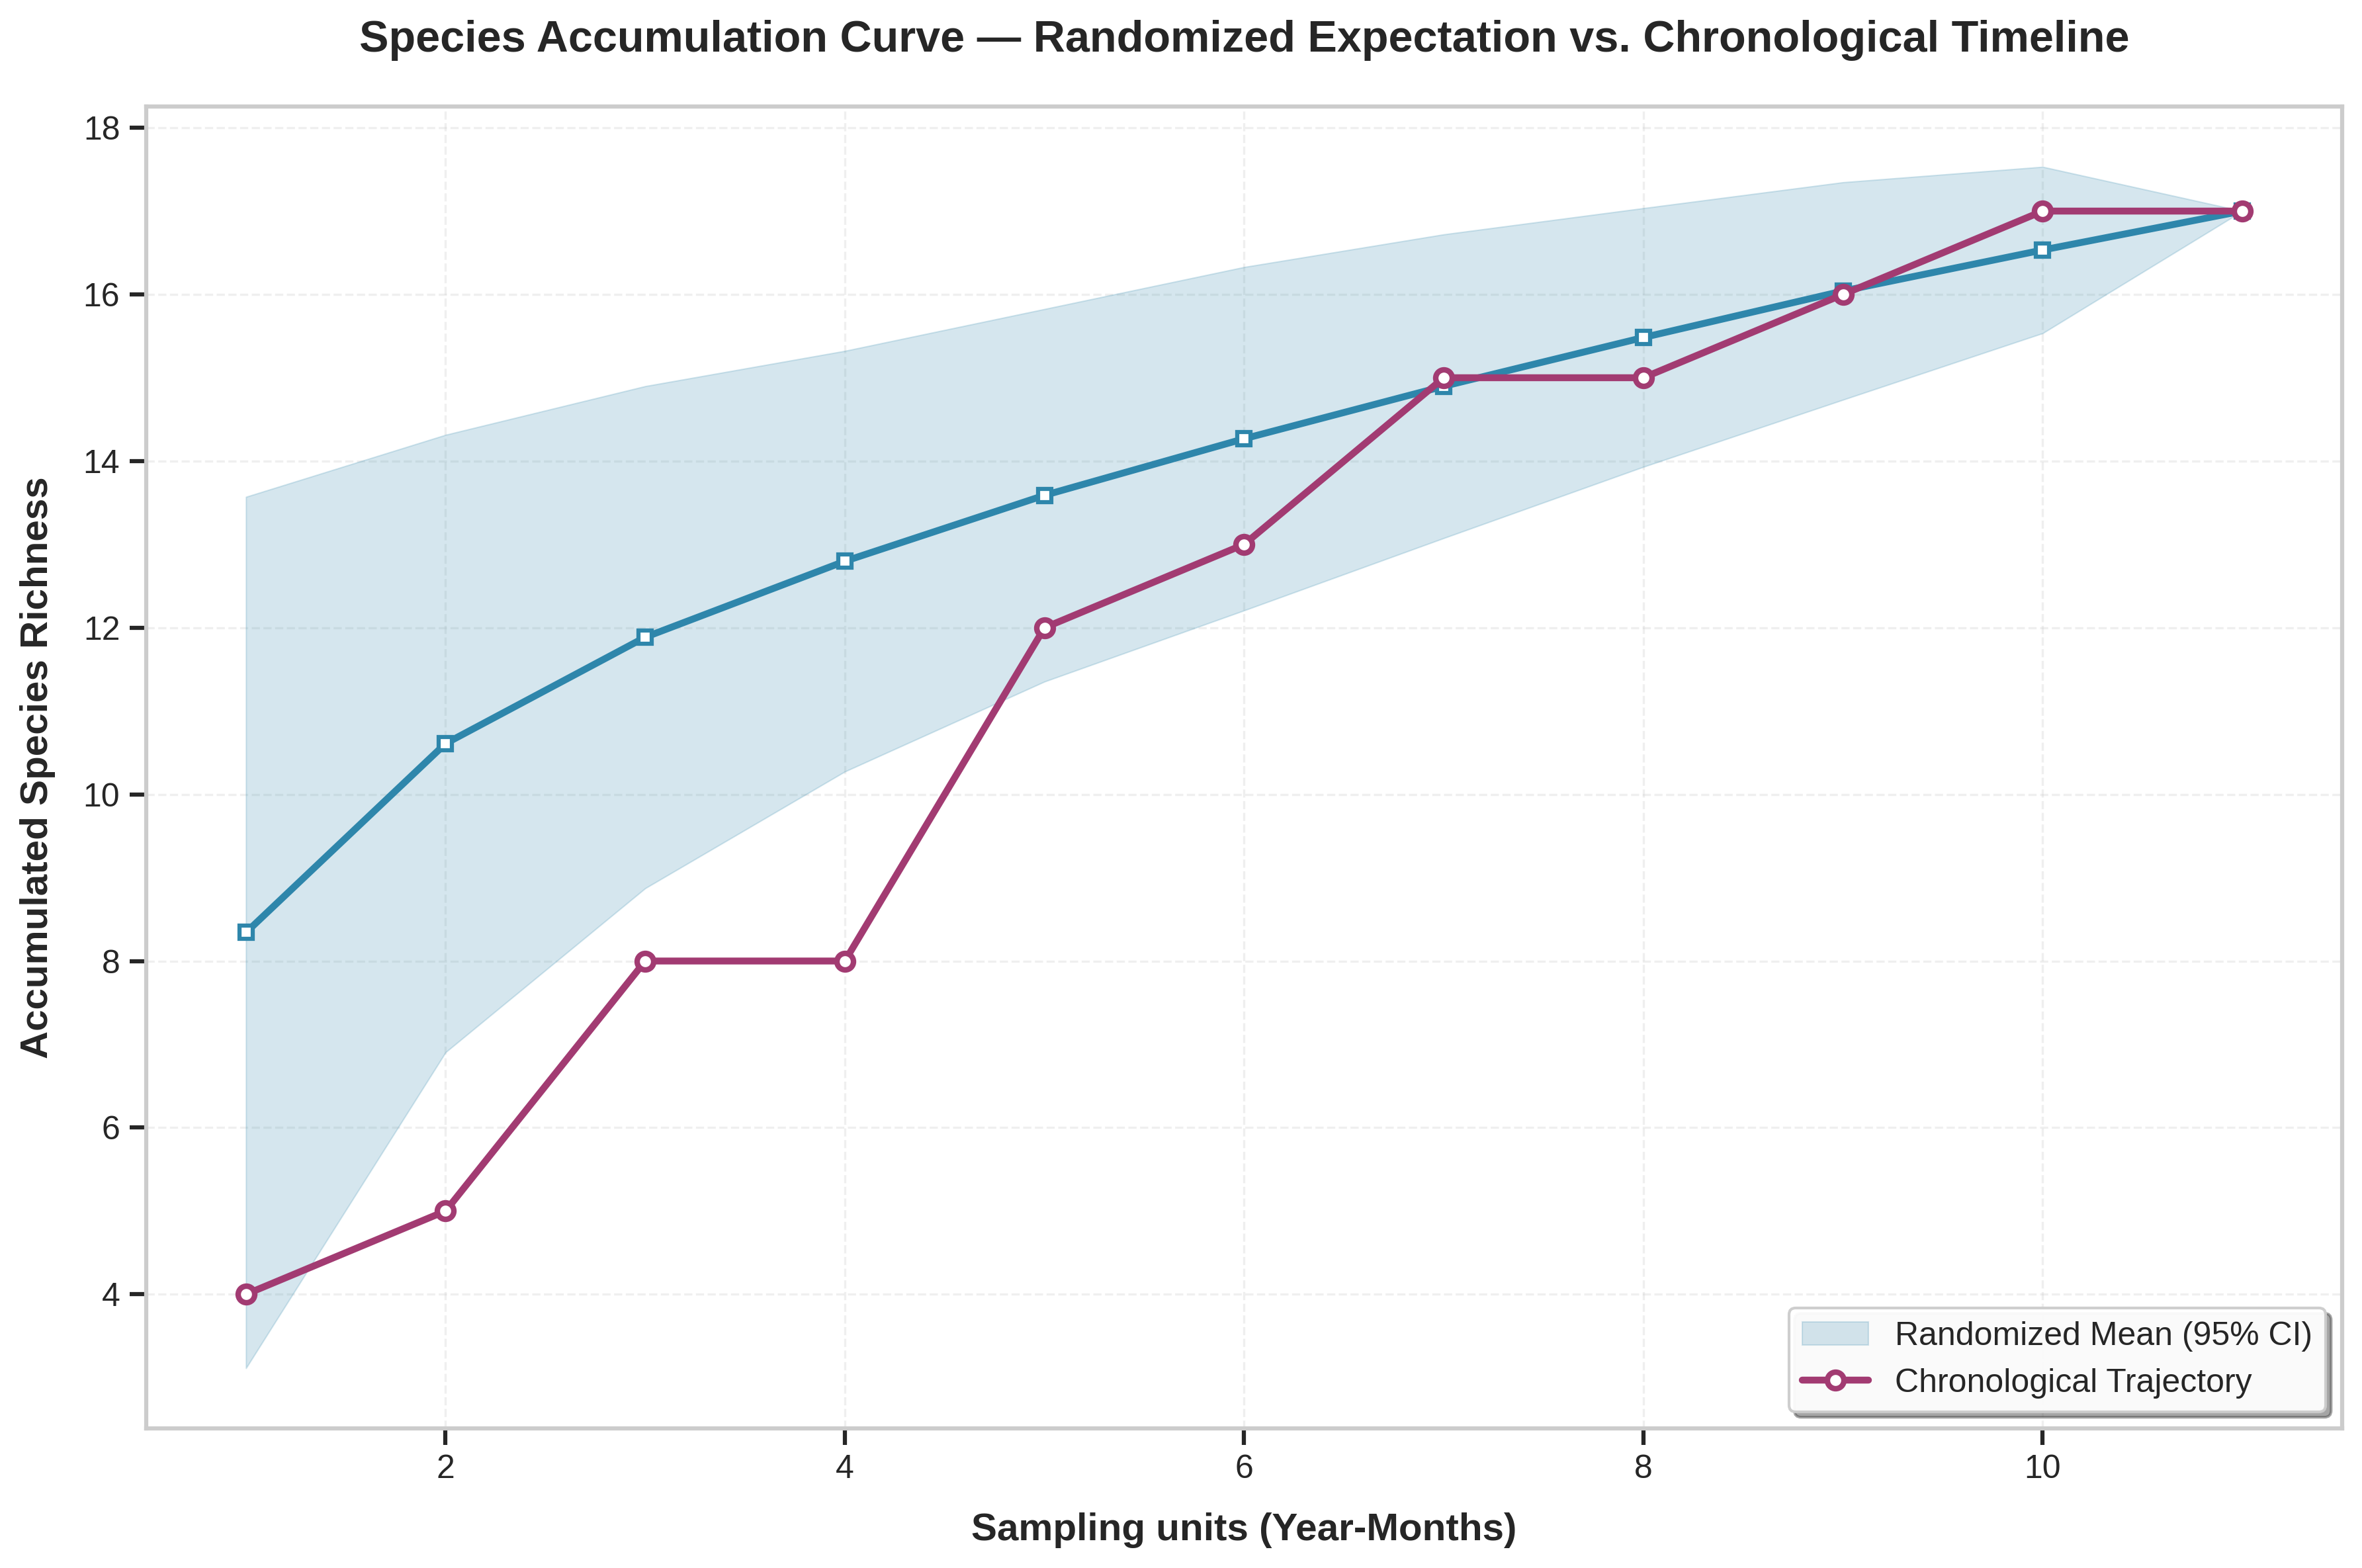

In [15]:
# Create a Year-Month column for granularity
df_array = df_array.copy() # Avoid SettingWithCopyWarning
df_array['Year_Month'] = df_array['Year'].astype(str) + "-" + df_array['Month']

# Create Matrix
mat_month = get_species_matrix(df_array, unit_col='Year_Month')
mat_month = mat_month.sort_index() # Sort chronologically

# Randomized
acc_rand_month = species_accumulation(mat_month, method='random', permutations=1000)

# Chronological
acc_time_month = species_accumulation(mat_month, method='collector')

# Combined Plot with publication-quality styling
_fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

# Set style for publication
plt.style.use('seaborn-v0_8-whitegrid')

# Plot Random (with fill)
x = acc_rand_month['sites']
y = acc_rand_month['richness']
sd = acc_rand_month['sd']

# Confidence interval for randomized
ax.fill_between(x, y - 2*sd, y + 2*sd, 
                color='#2E86AB', alpha=0.2, 
                label='Randomized Mean (95% CI)',
                edgecolor='#2E86AB', linewidth=0.5)

# Randomized mean line with markers
ax.plot(x, y, color='#2E86AB', linewidth=2.5, 
        marker='s', markersize=5, markerfacecolor='white',
        markeredgewidth=1.5, markeredgecolor='#2E86AB', zorder=3)

# Plot Collector (Line + Points)
ax.plot(acc_time_month['sites'], acc_time_month['richness'],
        color='#A23B72', linewidth=2.5, 
        marker='o', markersize=6, markerfacecolor='white',
        markeredgewidth=2, markeredgecolor='#A23B72',
        label='Chronological Trajectory', zorder=3)

# Enhance grid
ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.8)
ax.set_axisbelow(True)

# Labels and title with better formatting
ax.set_xlabel("Sampling units (Year-Months)", fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel("Accumulated Species Richness", fontsize=14, fontweight='bold', labelpad=10)
ax.set_title("Species Accumulation Curve — Randomized Expectation vs. Chronological Timeline", 
             fontsize=16, fontweight='bold', pad=20)

# Improve tick labels
ax.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5)

# Add legend with better formatting
ax.legend(loc='lower right', frameon=True, fancybox=True, 
         shadow=True, fontsize=12, framealpha=0.95)

# Set spine width
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

## Spatial Analysis
SAC by Deployment (Site) for a selected array and year

In [16]:
# Manually pick camera trap array for spatial analysis
selected_array = "Herrera"
selected_year = 2020

# Get list of deployment IDs for selected array in one year
deployment_ids = df_arrays_5_years[
    (df_arrays_5_years['Camera_Trap_Array'] == selected_array) & 
    (df_arrays_5_years['Year'] == selected_year)
]['Deployment_ID'].unique()

print(f"Selected Array: {selected_array}")
print(f"Selected Year: {selected_year}")
print(f"Number of deployments: {len(deployment_ids)}")

Selected Array: Herrera
Selected Year: 2020
Number of deployments: 143


In [17]:
# Create occurrence matrix by Deployment_ID for the selected array and year
df_selected = df_arrays_5_years[
    (df_arrays_5_years['Camera_Trap_Array'] == selected_array) & 
    (df_arrays_5_years['Year'] == selected_year)
].copy()

# Create presence/absence matrix by Deployment_ID
mat_deployment = get_species_matrix(df_selected, unit_col='Deployment_ID', species_col='Sci_Name')

print(f"Matrix shape: {mat_deployment.shape}")
mat_deployment.head()

Matrix shape: (143, 10)


Sci_Name,didelphis virginiana,marmota monax,odocoileus virginianus,peromyscus leucopus,procyon lotor,sciurus carolinensis,sciurus niger,sylvilagus floridanus,tamias striatus,vulpes vulpes
Deployment_ID,,,,,,,,,,
HH0101,0,0,1,0,1,1,0,1,0,1
HH0102,0,0,1,0,1,1,0,1,0,1
HH0103,0,0,0,0,0,1,0,0,0,1
HH0104,0,0,0,0,1,1,0,1,1,0
HH0105,0,0,0,0,1,0,0,0,0,0


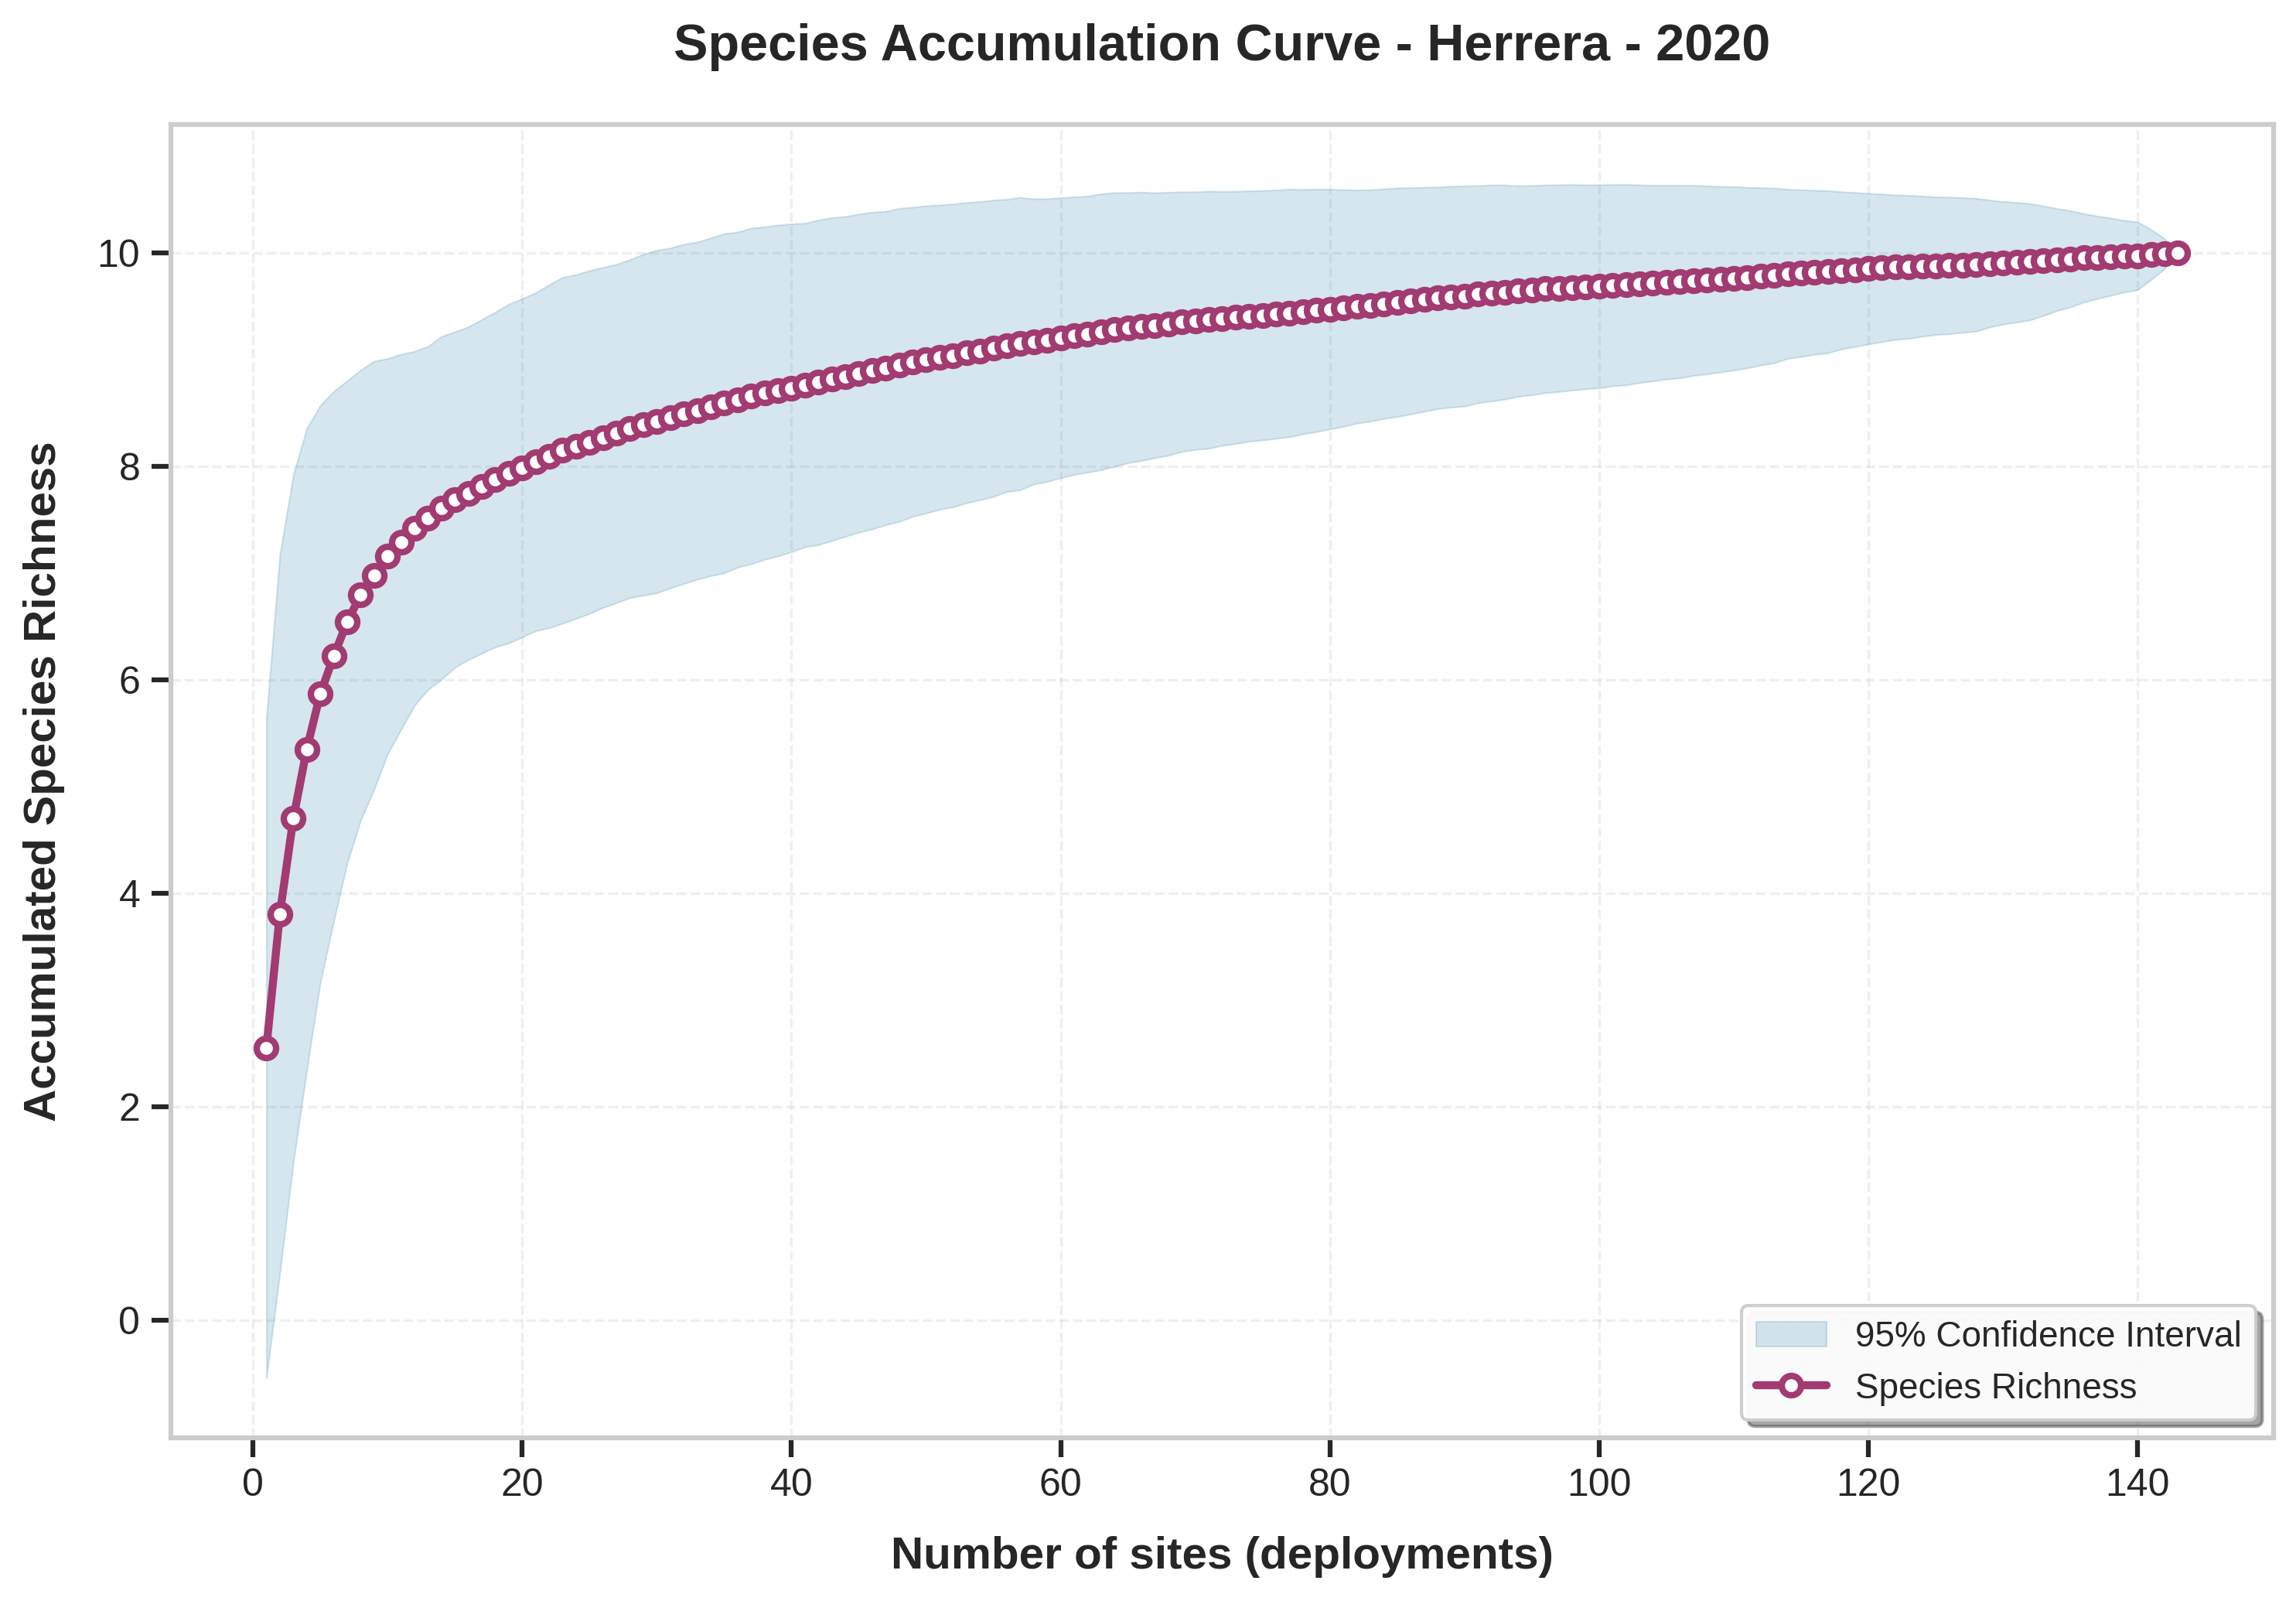

Observed richness: 10.0


In [18]:
# Species accumulation (randomized) by deployment
acc_rand_deployment = species_accumulation(mat_deployment, method='random', permutations=1000)

# Plot
plot_sac(acc_rand_deployment,
         title=f"Species Accumulation Curve - {selected_array} - {selected_year}",
         xlabel="Number of sites (deployments)")

print(f"Observed richness: {acc_rand_deployment['richness'][-1]}")

### Site SAC
Species Accumulation Curve for individual deployment sites using daily sampling units

In [19]:
def sac_for_site(df, species_col, selected_array, selected_site,
                 array_col='Camera_Trap_Array', site_col='Deployment_ID',
                 start_col='Start_Date', end_col='End_Date', end_time_col='End_Time'):
    """
    Build a species accumulation curve for a single deployment site using daily sampling units.
    
    Parameters:
    - df: pandas DataFrame containing the data
    - species_col: column name for species identification
    - selected_array: name of the camera trap array
    - selected_site: deployment ID to analyze
    - array_col, site_col, start_col, end_col, end_time_col: column names
    
    Returns:
    - dict containing 'acc_curve' (SAC data), 'matrix' (daily presence/absence), and 'info' (metadata)
    """
    # Filter to the selected array + deployment
    df_dep = df[(df[array_col] == selected_array) & (df[site_col] == selected_site)].copy()
    
    if len(df_dep) == 0:
        raise ValueError("No rows found for the selected array/deployment.")
    
    # Parse dates
    df_dep[start_col] = pd.to_datetime(df_dep[start_col])
    df_dep[end_col] = pd.to_datetime(df_dep[end_col])
    
    start_date = df_dep[start_col].min()
    end_date = df_dep[end_col].max()
    
    if pd.isna(start_date) or pd.isna(end_date) or start_date > end_date:
        raise ValueError("Invalid or missing Start_Date/End_Date for the selected deployment.")
    
    # Build full daily grid (assumes camera was out for this entire window)
    days_grid = pd.DataFrame({'Date': pd.date_range(start_date, end_date, freq='D')})
    
    # Collapse detections to daily presence per species (from End_Time)
    df_dep['End_Time_parsed'] = pd.to_datetime(df_dep[end_time_col], errors='coerce')
    df_dep['DateFromEnd'] = df_dep['End_Time_parsed'].dt.date
    
    # Get daily presence by species
    present_by_day = df_dep[
        (df_dep[species_col].notna()) & 
        (df_dep[species_col] != '') & 
        (df_dep['DateFromEnd'].notna())
    ][['DateFromEnd', species_col]].drop_duplicates()
    
    present_by_day['Date'] = pd.to_datetime(present_by_day['DateFromEnd'])
    present_by_day['present'] = 1
    
    # Pivot to wide format
    if len(present_by_day) > 0:
        pa_pivot = present_by_day.pivot_table(
            index='Date', columns=species_col, values='present', 
            fill_value=0, aggfunc='max'
        ).reset_index()
    else:
        pa_pivot = pd.DataFrame({'Date': []})
    
    # Join detections onto full sampled window
    days_grid['Date'] = pd.to_datetime(days_grid['Date'])
    if len(pa_pivot) > 0:
        pa_full = days_grid.merge(pa_pivot, on='Date', how='left').fillna(0)
    else:
        pa_full = days_grid.copy()
        pa_full['__NO_DETECTIONS__'] = 0
    
    pa_full = pa_full.sort_values('Date')
    
    # Build day x species matrix
    species_cols = [c for c in pa_full.columns if c != 'Date']
    mat_site = pa_full[species_cols].astype(int)
    mat_site.index = pa_full['Date'].dt.strftime('%Y-%m-%d')
    
    # Chronological SAC (collector uses row order as given)
    acc_curve = species_accumulation(mat_site, method='collector')
    
    return {
        'acc_curve': acc_curve,
        'matrix': mat_site,
        'info': {
            'array_id': selected_array,
            'deployment_id': selected_site,
            'trap_nights': len(mat_site),
            'n_species': len(species_cols),
            'date_range': (pa_full['Date'].min().strftime('%Y-%m-%d'), 
                          pa_full['Date'].max().strftime('%Y-%m-%d'))
        }
    }

In [20]:
# Select a specific deployment for site-level SAC
selected_array = "Herrera"
selected_site = "DC_COCanal1 09/03/2021"  # Or try "MH0704"

res = sac_for_site(df_arrays_5_years, species_col='Sci_Name',
                   selected_array=selected_array,
                   selected_site=selected_site)

print(f"Array: {res['info']['array_id']}")
print(f"Deployment: {res['info']['deployment_id']}")
print(f"Trap nights: {res['info']['trap_nights']}")
print(f"Species detected: {res['info']['n_species']}")
print(f"Date range: {res['info']['date_range']}")

Array: Herrera
Deployment: DC_COCanal1 09/03/2021
Trap nights: 29
Species detected: 5
Date range: ('2021-09-03', '2021-10-01')


In [21]:
# View the daily presence/absence matrix
res['matrix'].head(10)

,canis latrans,castor canadensis,odocoileus virginianus,procyon lotor,vulpes vulpes
Date,,,,,
2021-09-03,0,1,0,0,0
2021-09-04,0,1,1,0,1
2021-09-05,0,1,0,0,0
2021-09-06,0,1,1,0,0
2021-09-07,0,1,1,0,0
2021-09-08,0,1,1,0,0
2021-09-09,0,1,1,0,0
2021-09-10,0,1,0,0,0
2021-09-11,0,1,0,0,0


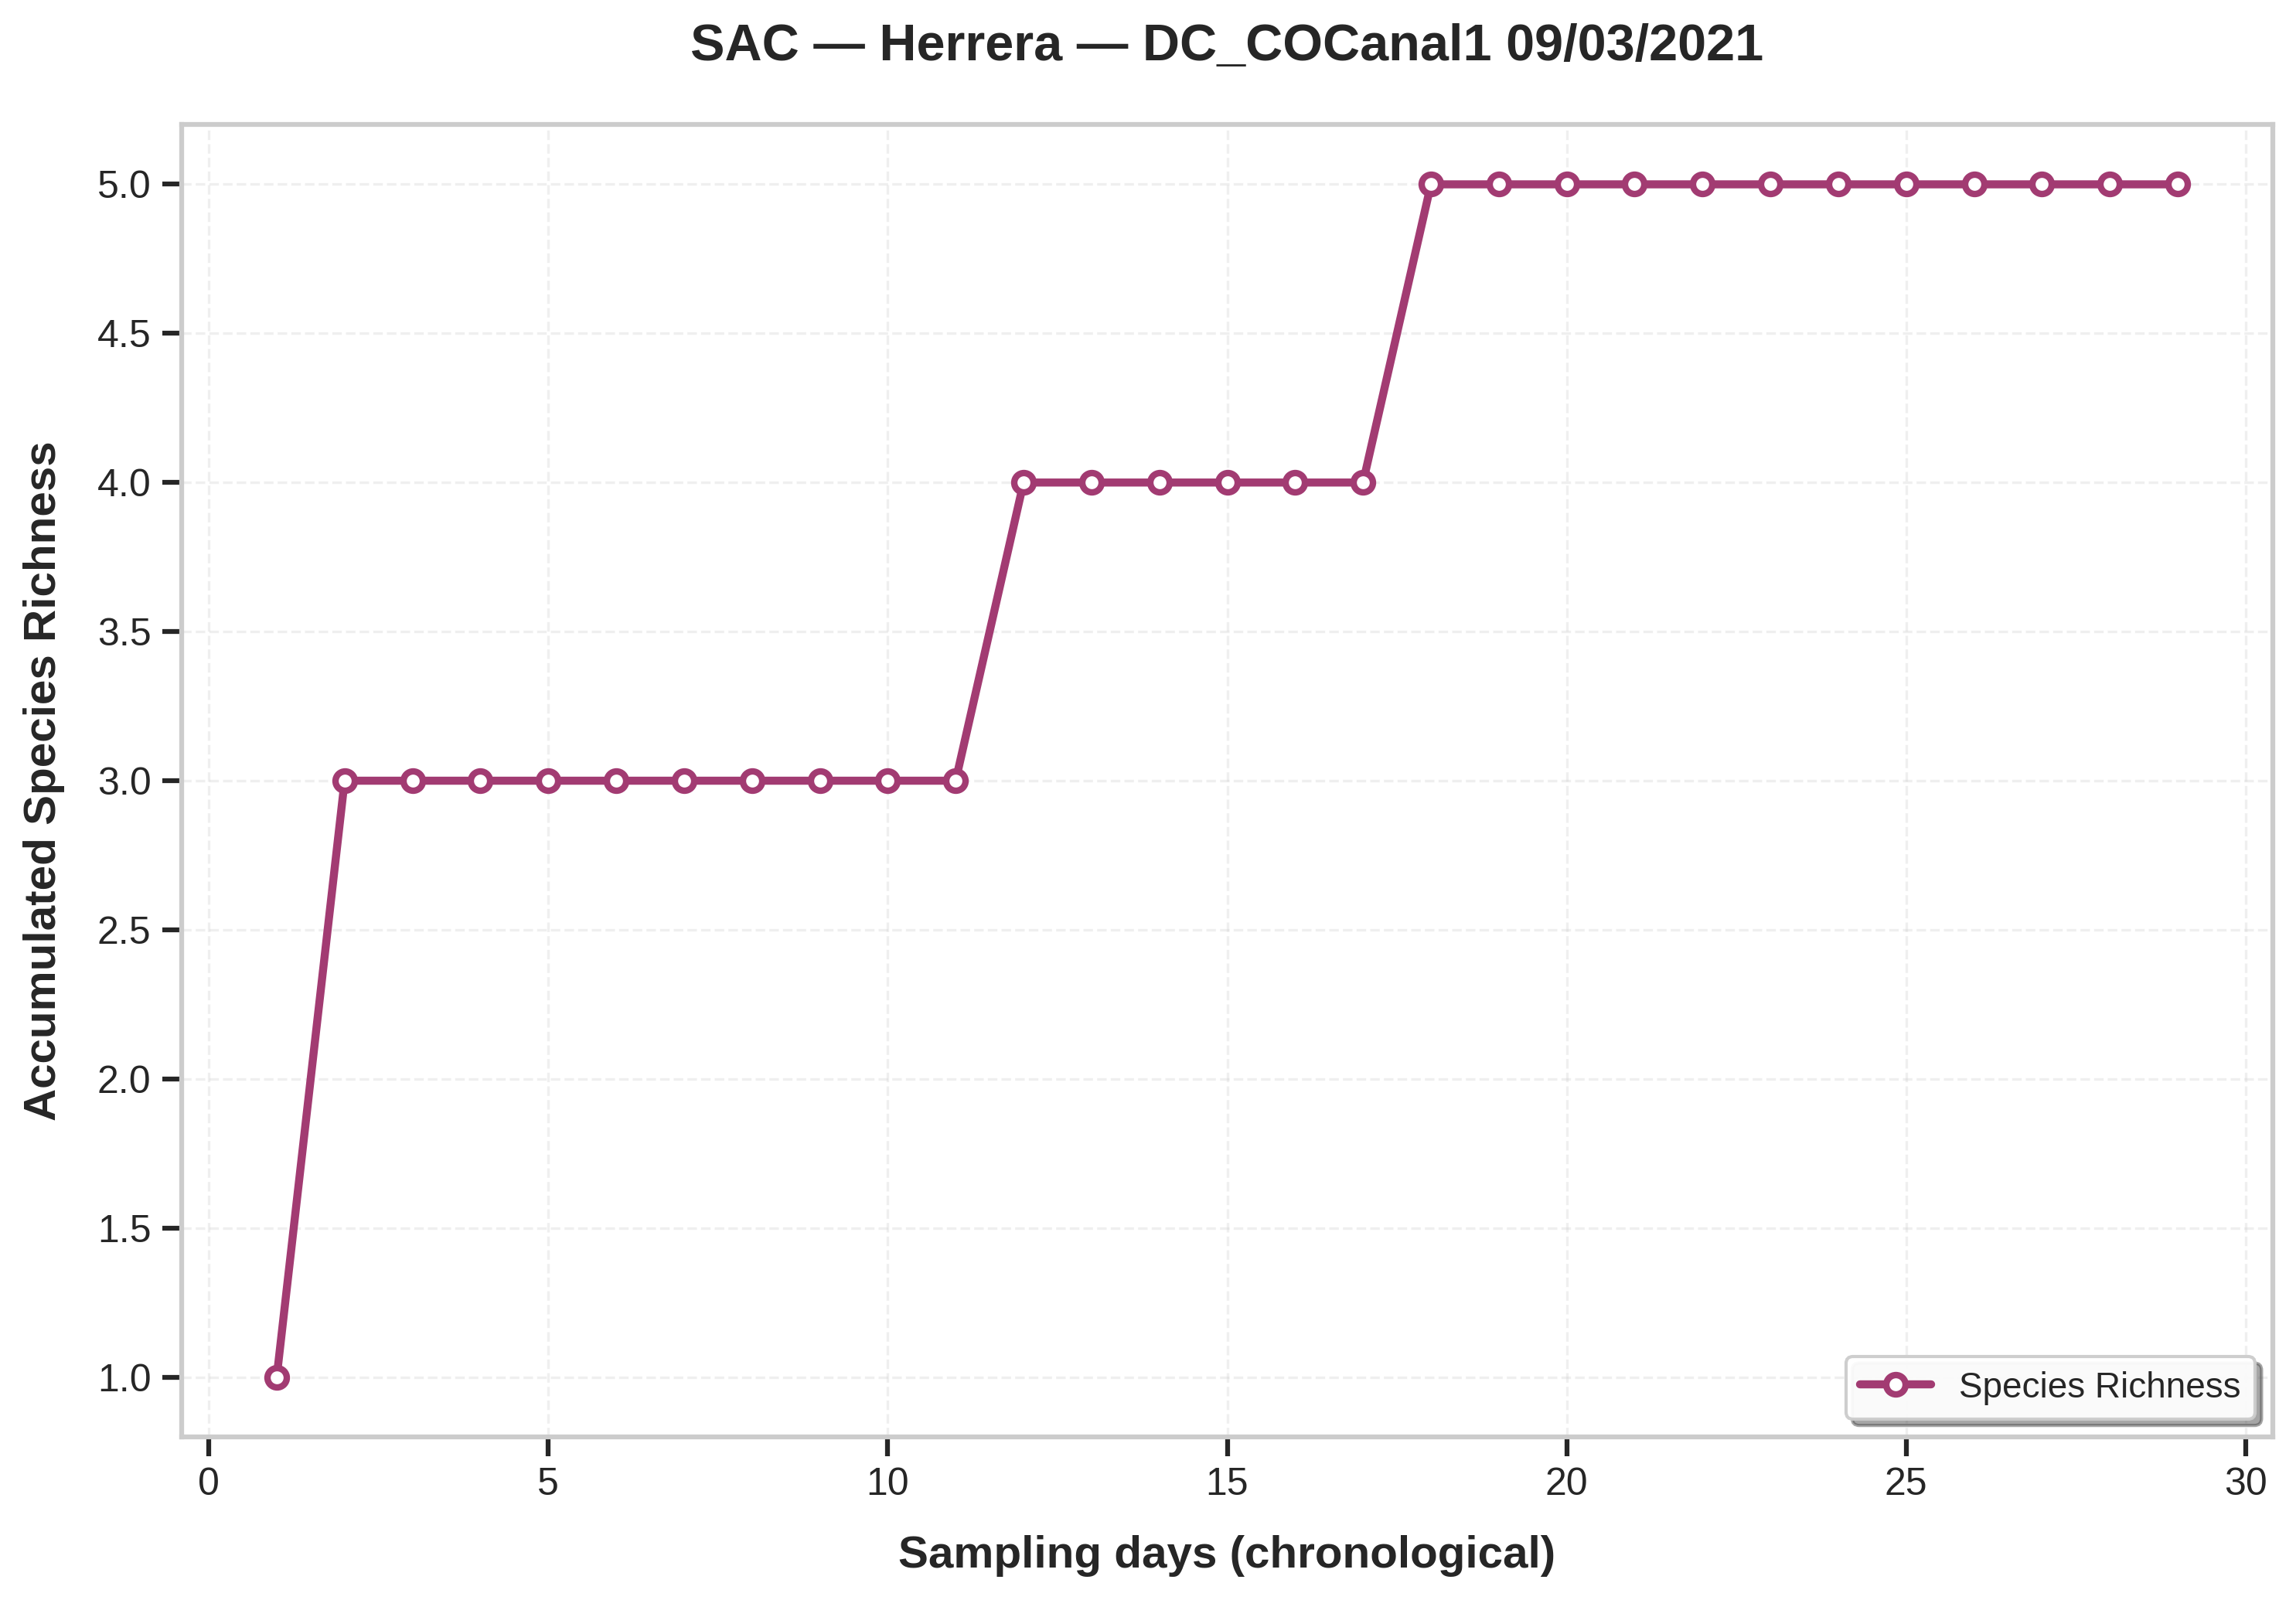

In [22]:
# Plot the site-level SAC
plot_sac(res['acc_curve'],
         title=f"SAC — {res['info']['array_id']} — {res['info']['deployment_id']}",
         xlabel="Sampling days (chronological)")

### SAC Quality Assessment
Fit a Clench model to evaluate sampling completeness

In [23]:
def sac_quality(mat, target=0.90, slope_thresh=0.02, model='michaelis-menten'):
    """
    Assess SAC quality by fitting a species accumulation model using vegan::fitspecaccum.
    
    Parameters:
    - mat: presence/absence matrix (rows = effort steps, cols = species)
    - target: completeness threshold (default 0.90 = 90%)
    - slope_thresh: slope threshold for determining if curve has plateaued
    - model: model to fit. Options from vegan:
        * 'arrhenius' - power model S = c * A^z
        * 'gleason' - S = c + z * log(A)
        * 'gitay' - S = c + z * log(log(A))
        * 'lomolino' - S = Asym / (1 + slope^log(xmid/A))
        * 'asymp' - asymptotic model
        * 'gompertz' - Gompertz model
        * 'michaelis-menten' - Michaelis-Menten model (default, similar to Clench)
        * 'logis' - logistic model
        * 'weibull' - Weibull model
    
    Returns:
    - dict with completeness value, pass/fail, metrics, and model parameters
    """
    vegan = importr('vegan')
    
    # Convert matrix to R
    with localconverter(pandas2ri.converter + robjects.default_converter):
        r_matrix = pandas2ri.py2rpy(mat)
    
    # First get the specaccum object
    try:
        acc_r = vegan.specaccum(r_matrix, method='collector')
    except Exception as e:
        return {
            'value': np.nan,
            'pass': False,
            'reason': f'specaccum failed: {str(e)}',
            'metrics': {'completeness': np.nan, 'slope_last': np.nan},
            'params': {}
        }
    
    # Extract sites and richness for Python calculations
    with localconverter(pandas2ri.converter + robjects.default_converter):
        x = np.array(robjects.r('as.numeric')(acc_r.rx2('sites')))
        y = np.array(robjects.r('as.numeric')(acc_r.rx2('richness')))
    
    if len(y) < 3 or np.sum(y > 0) < 3:
        return {
            'value': np.nan,
            'pass': False,
            'reason': 'Too few positive points to fit model',
            'metrics': {'completeness': np.nan, 'slope_last': np.nan},
            'params': {}
        }
    
    # Fit the model using vegan::fitspecaccum
    try:
        fit_r = vegan.fitspecaccum(acc_r, model=model)
        
        # Extract coefficients
        with localconverter(pandas2ri.converter + robjects.default_converter):
            coefs = dict(zip(
                list(robjects.r('names')(robjects.r('coef')(fit_r))),
                list(robjects.r('as.numeric')(robjects.r('coef')(fit_r)))
            ))
            fitted_vals = np.array(robjects.r('as.numeric')(robjects.r('fitted')(fit_r)))
    except Exception as e:
        return {
            'value': np.nan,
            'pass': False,
            'reason': f'Model fitting failed: {str(e)}',
            'metrics': {'completeness': np.nan, 'slope_last': np.nan},
            'params': {}
        }
    
    # Calculate metrics based on model type
    xlast = x[-1]
    ylast = y[-1]
    
    # For Michaelis-Menten: y = Vm * x / (K + x), asymptote = Vm
    # For asymptotic models, get the asymptote parameter
    if 'Vm' in coefs:  # Michaelis-Menten
        S_inf = coefs['Vm']
        K = coefs['K']
        slope_last = (S_inf * K) / (K + xlast)**2
    elif 'Asym' in coefs:  # asymp, gompertz, logis
        S_inf = coefs['Asym']
        # Approximate slope from fitted values
        if len(fitted_vals) >= 2:
            slope_last = fitted_vals[-1] - fitted_vals[-2]
        else:
            slope_last = 0
        K = None
    else:
        # For non-asymptotic models, estimate from last fitted value
        S_inf = fitted_vals[-1] * 1.1  # rough estimate
        slope_last = (fitted_vals[-1] - fitted_vals[-2]) if len(fitted_vals) >= 2 else 0
        K = None
    
    completeness = ylast / S_inf if S_inf > 0 else np.nan
    extra_one = 1 / slope_last if slope_last > 0 else np.inf
    
    # Effort needed for 90% and 95% (for Michaelis-Menten: x = K * p / (1 - p))
    if K is not None:
        N90 = 9 * K  # K * 0.9 / 0.1
        N95 = 19 * K  # K * 0.95 / 0.05
        add90 = max(0, N90 - xlast)
        add95 = max(0, N95 - xlast)
    else:
        N90 = N95 = add90 = add95 = np.nan
    
    # Scoring
    comp_score = min(1, completeness) if not np.isnan(completeness) else 0
    slope_score = 1 - min(1, slope_last / slope_thresh) if slope_last > 0 else 1
    score = 100 * (0.7 * comp_score + 0.3 * slope_score)
    pass_test = (completeness >= target) and (slope_last <= slope_thresh)
    
    return {
        'value': completeness,
        'pass': pass_test,
        'score': score,
        'model': model,
        'metrics': {
            'completeness': completeness,
            'slope_last': slope_last,
            'extra_effort_for_plus1': extra_one,
            'effort_90pct': N90,
            'add_to_90': add90,
            'effort_95pct': N95,
            'add_to_95': add95
        },
        'params': coefs
    }

In [24]:
# Assess SAC quality for the selected site using vegan::fitspecaccum
q = sac_quality(res['matrix'], model='michaelis-menten')

print(f"Model: {q.get('model', 'N/A')}")
print(f"Completeness: {q['value']:.2%}")
print(f"Pass threshold (≥90%): {q['pass']}")
print(f"Score: {q['score']:.1f}/100")
print(f"\nDetailed metrics:")
for key, val in q['metrics'].items():
    if isinstance(val, float) and not np.isnan(val):
        print(f"  {key}: {val:.4f}")
    else:
        print(f"  {key}: {val}")
print(f"\nModel parameters (from vegan::fitspecaccum):")
for key, val in q['params'].items():
    print(f"  {key}: {val:.4f}" if isinstance(val, float) else f"  {key}: {val}")

Model: michaelis-menten
Completeness: 86.39%
Pass threshold (≥90%): False
Score: 60.5/100

Detailed metrics:
  completeness: 0.8639
  slope_last: 0.0253
  extra_effort_for_plus1: 39.4485
  effort_90pct: 45.8107
  add_to_90: 16.8107
  effort_95pct: 96.7114
  add_to_95: 67.7114

Model parameters (from vegan::fitspecaccum):
  Vm: 5.7876
  K: 5.0901


### Plot Multiple Sites
Generate a grid of SAC plots for multiple deployments

In [25]:
def plot_multiple_sites(df, species_col, selected_array, site_ids,
                        array_col='Camera_Trap_Array', site_col='Deployment_ID',
                        start_col='Start_Date', end_col='End_Date', end_time_col='End_Time',
                        ncol=3, width=5, height=5):
    """
    Plot SAC curves for multiple deployment sites in a grid layout.
    
    Parameters:
    - df: pandas DataFrame containing the data
    - species_col: column name for species identification
    - selected_array: name of the camera trap array
    - site_ids: list of deployment IDs to plot
    - ncol: number of columns in the grid
    - width, height: size of each subplot in inches
    """
    n_sites = len(site_ids)
    if n_sites == 0:
        raise ValueError("No site IDs provided")
    
    # Calculate grid dimensions
    nrow = int(np.ceil(n_sites / ncol))
    
    # Create figure
    _fig, axes = plt.subplots(nrow, ncol, figsize=(width * ncol, height * nrow), dpi=150)
    axes = np.atleast_2d(axes)  # Ensure 2D array even for single row
    
    # Plot each site
    for idx, site_id in enumerate(site_ids):
        row = idx // ncol
        col = idx % ncol
        ax = axes[row, col]
        
        try:
            res = sac_for_site(
                df=df,
                species_col=species_col,
                selected_array=selected_array,
                selected_site=site_id,
                array_col=array_col,
                site_col=site_col,
                start_col=start_col,
                end_col=end_col,
                end_time_col=end_time_col
            )
            
            x = res['acc_curve']['sites']
            y = res['acc_curve']['richness']
            
            ax.plot(x, y, color='#2E86AB', linewidth=2, marker='o', markersize=3)
            ax.set_xlabel("Days", fontsize=10)
            ax.set_ylabel("Species", fontsize=10)
            ax.set_title(f"{res['info']['deployment_id']}", fontsize=10, fontweight='bold')
            ax.grid(True, linestyle='--', alpha=0.3)
            
        except Exception:
            ax.text(0.5, 0.5, f"Error:\n{site_id}", ha='center', va='center', 
                   fontsize=8, transform=ax.transAxes)
            ax.set_xticks([])
            ax.set_yticks([])
    
    # Hide empty subplots
    for idx in range(n_sites, nrow * ncol):
        row = idx // ncol
        col = idx % ncol
        axes[row, col].axis('off')
    
    plt.suptitle(f"Species Accumulation Curves — {selected_array}", 
                fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

In [26]:
# Get all unique deployment IDs for Herrera array
herrera_deployments = df_arrays_5_years[
    df_arrays_5_years['Camera_Trap_Array'] == 'Herrera'
]['Deployment_ID'].unique()

print(f"Number of unique deployments in Herrera: {len(herrera_deployments)}")

Number of unique deployments in Herrera: 356


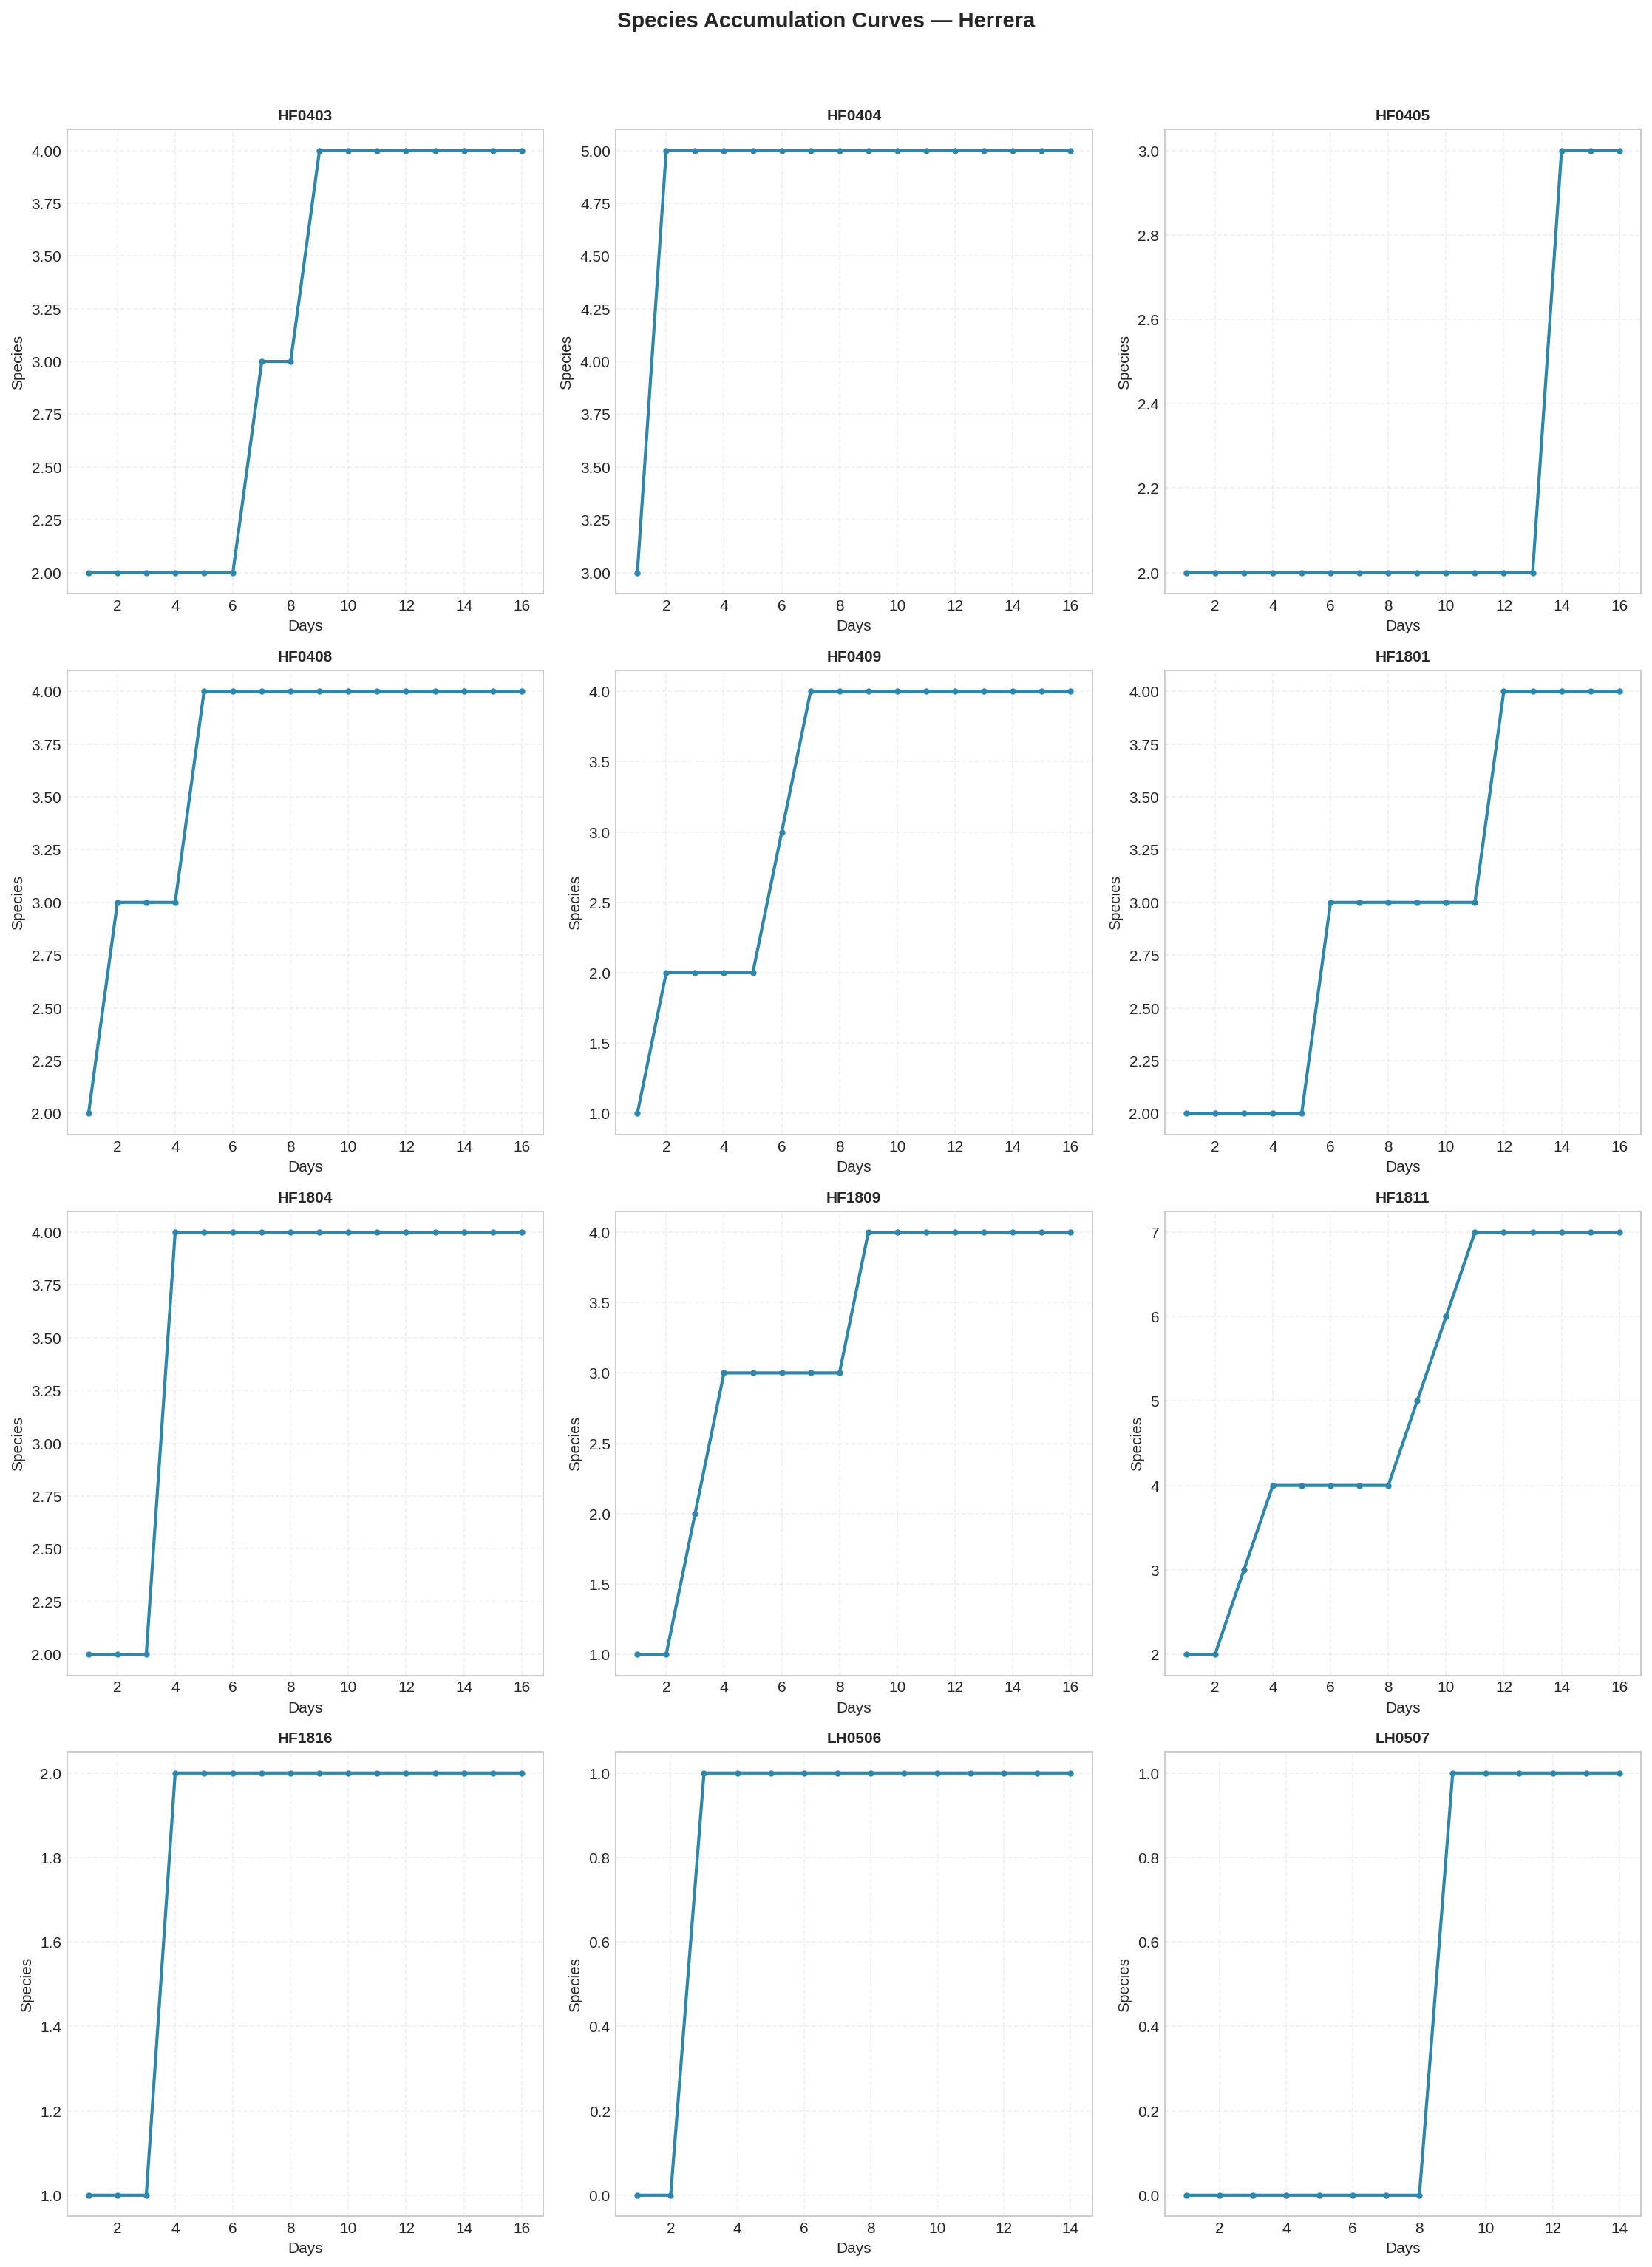

In [27]:
# Plot first 12 deployments
plot_multiple_sites(
    df=df_arrays_5_years,
    species_col='Sci_Name',
    selected_array='Herrera',
    site_ids=herrera_deployments[:12],
    ncol=3
)

In [28]:
# Find top 12 Herrera deployments with most records
top_herrera_deployments = (
    df_arrays_5_years[df_arrays_5_years['Camera_Trap_Array'] == 'Herrera']
    .groupby('Deployment_ID').size()
    .sort_values(ascending=False)
    .head(12)
    .index.tolist()
)

print(f"Top 12 deployments by record count: {top_herrera_deployments}")

Top 12 deployments by record count: ['DC_BerkshirePark 10/08/2021', 'DC_CricketGrounds 10/08/2021', 'DC_barcroftPark 10/13/2021', 'DC_Forest_Herrera_FoundryBranch 10/04/2023', 'DC_Forest_Urban_Tuckahoe 09/30/2022', 'DC_Forest_Urban_RCPboundaryBridge 10/03/2022', 'DC_Forest_Herrera_PotomacOverlookPark 10/03/2023', 'DC_Forest_Urban_RooseveltIsland 09/30/2022', 'DC_CapViewHomewoodPark 10/11/2021', 'DC_COCanal1 09/03/2021', 'DC_SligoCreekGolf 10/11/2021', 'DC_Forest_Herrera_ArmyNavyCountryClub 10/04/2023']


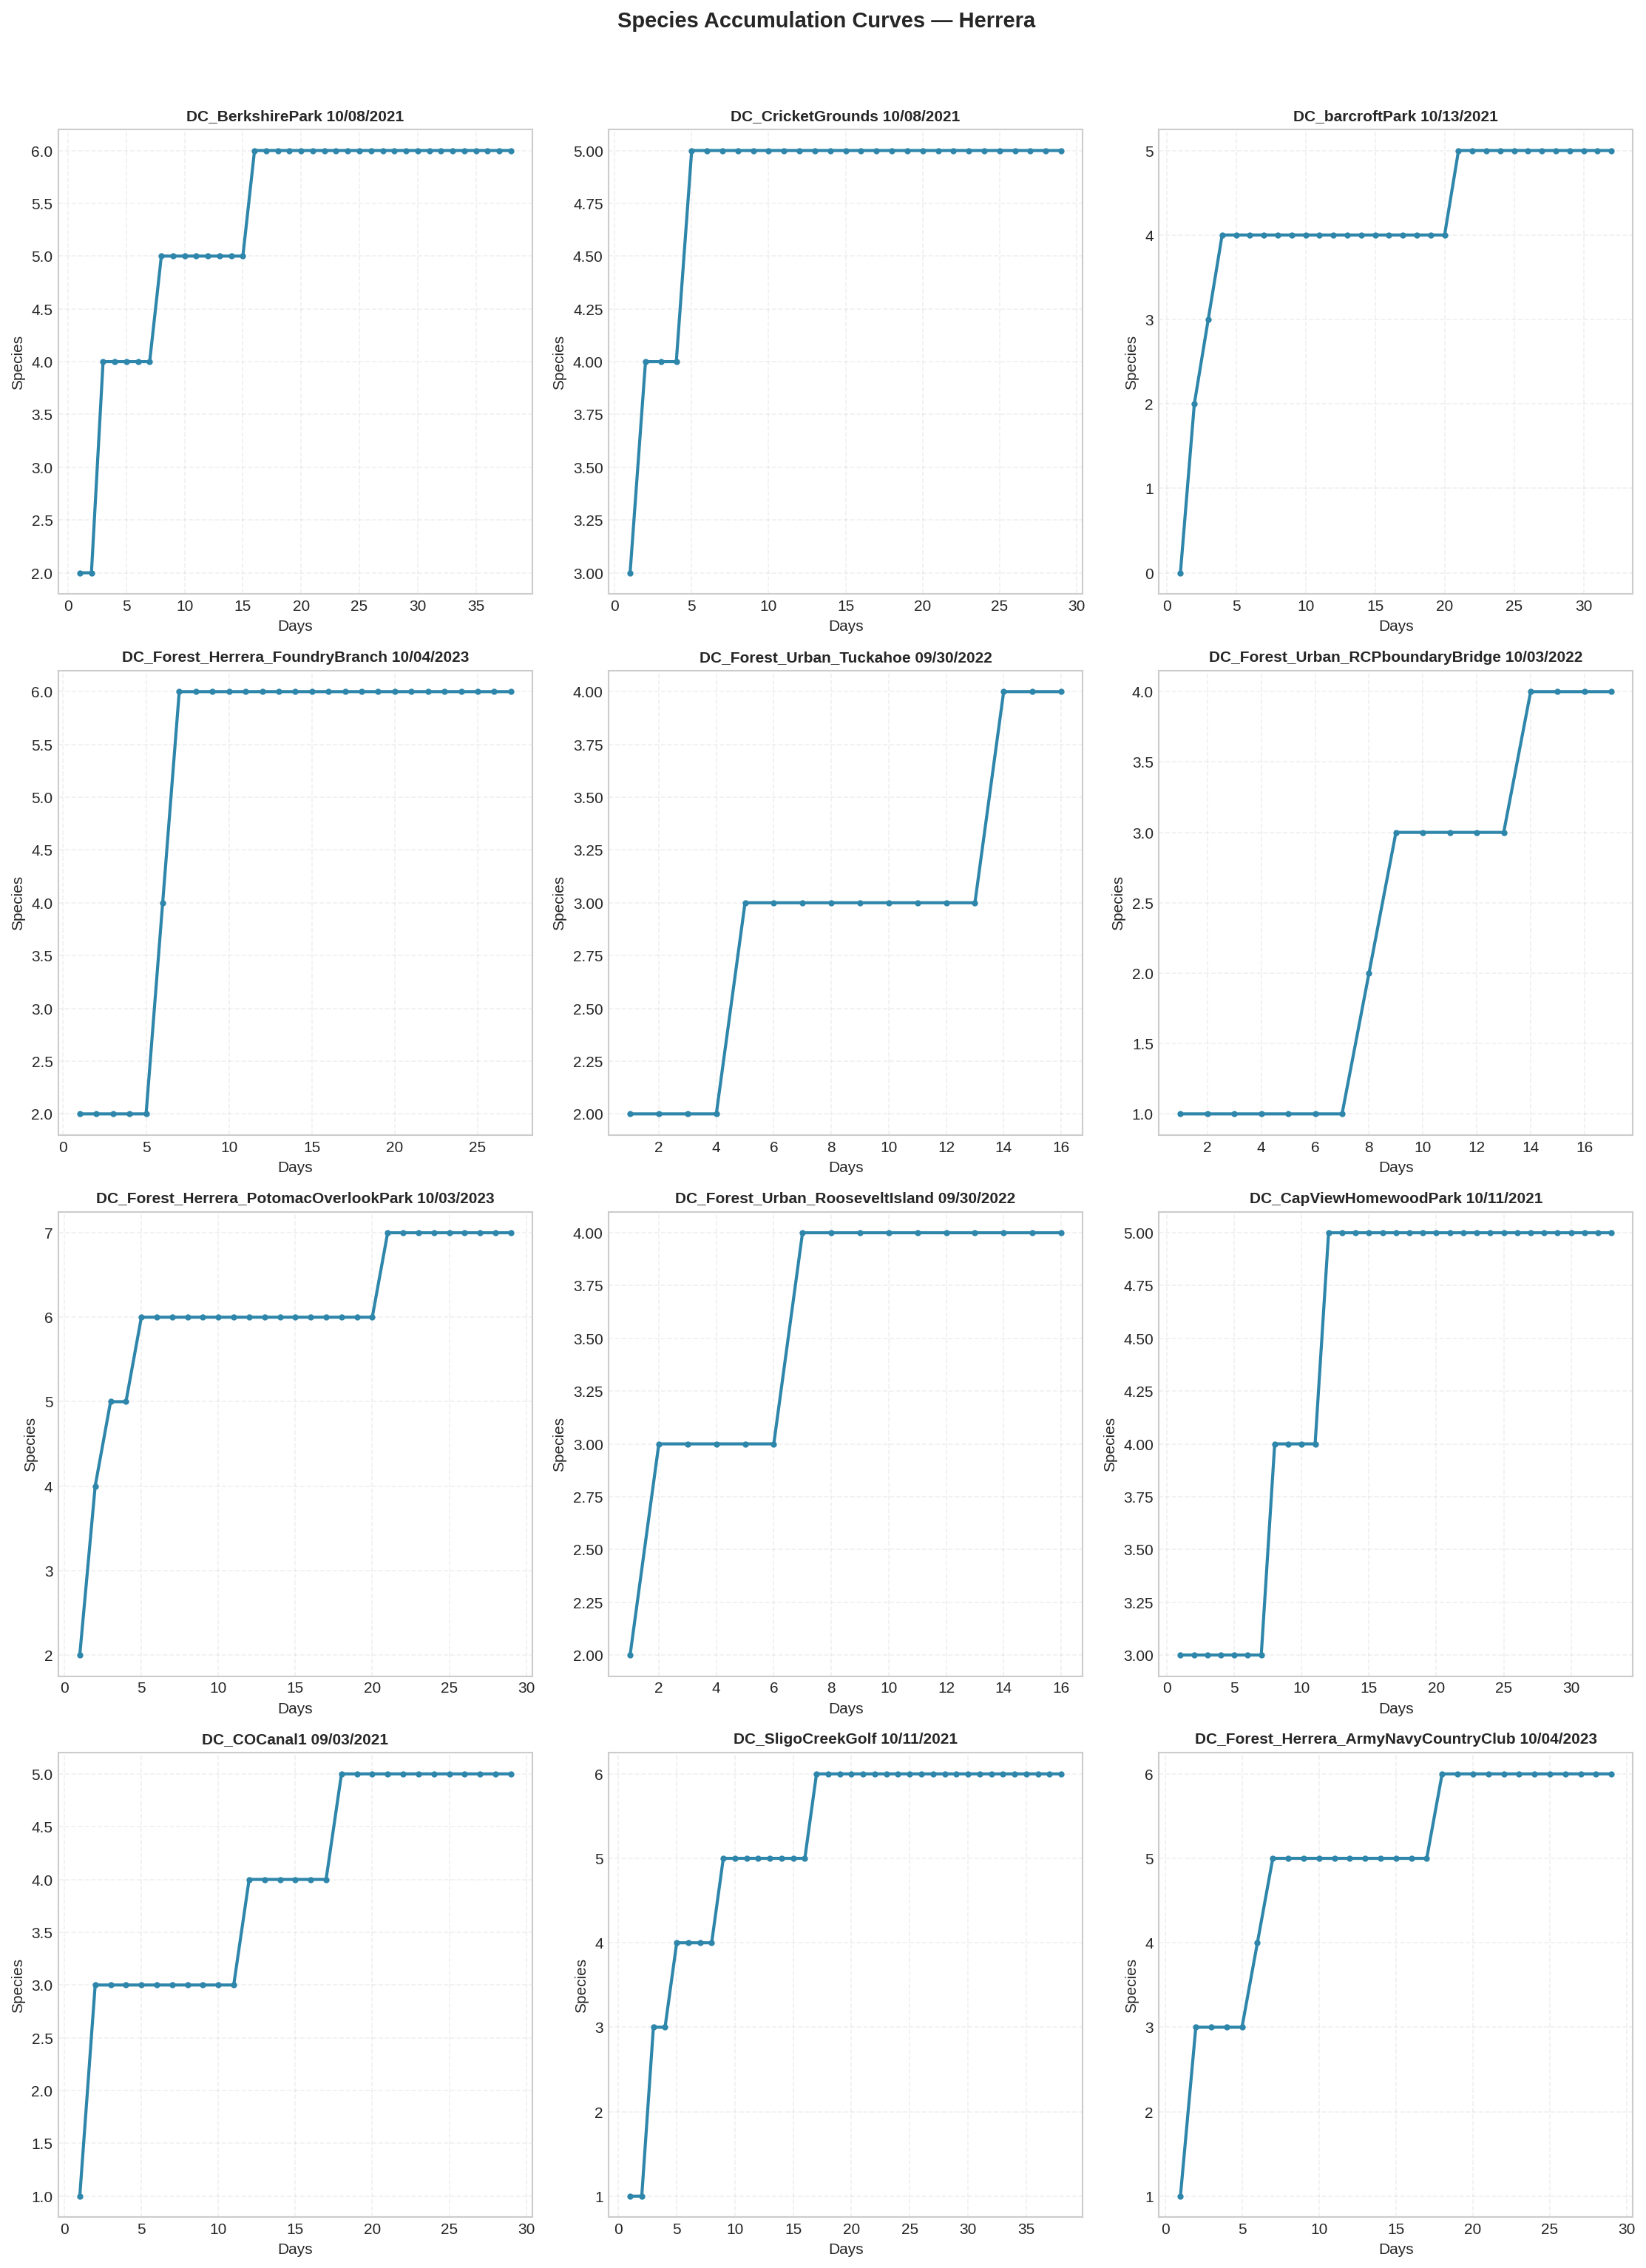

In [29]:
# Plot top 12 deployments by record count
plot_multiple_sites(
    df=df_arrays_5_years,
    species_col='Sci_Name',
    selected_array='Herrera',
    site_ids=top_herrera_deployments,
    ncol=3
)

## Spatial SAC by Camera Trap Array
Species Accumulation Curve where each sampling unit is a camera trap array. Shows how species richness accumulates as we add more arrays across the spatial landscape.

In [30]:
# Create presence/absence matrix: rows = Camera_Trap_Array, columns = Species
# Using all arrays from the 5-year dataset
mat_array = get_species_matrix(df_arrays_5_years, unit_col='Camera_Trap_Array', species_col='Sci_Name')

print(f"Matrix shape: {mat_array.shape}")
print(f"Number of arrays: {mat_array.shape[0]}")
print(f"Number of species: {mat_array.shape[1]}")
print(f"\nArrays included:")
print(mat_array.index.tolist())

Matrix shape: (41, 70)
Number of arrays: 41
Number of species: 70

Arrays included:
['Abilene', 'Angelina', 'Ardmore', 'Baggs', 'Bogan', 'BridgewaterState', 'Brooke', 'Brookings', 'BullShoals', 'Burneyville', 'Carrollton', 'Crupi', 'Fantle-Lepczyk', 'Freeman', 'Grafton', 'Herrera', 'HustonBrumbaugh', 'MTHansen', 'Matador', 'Mianus', 'NyeHolman', 'OakvillePrairie', 'OregonStateUni', 'PWAMartell', 'Pittsburg', 'Rentz', 'SCBI', 'SLC', 'Schenck', 'Shamon', 'Stenglein', 'Storrs', 'Tufts', 'URI', 'USAFA', 'UniversityResearchForest', 'UpperPeninsula', 'UpperPeninsula2', 'Urbana', 'Whitewater', 'WildBogan']


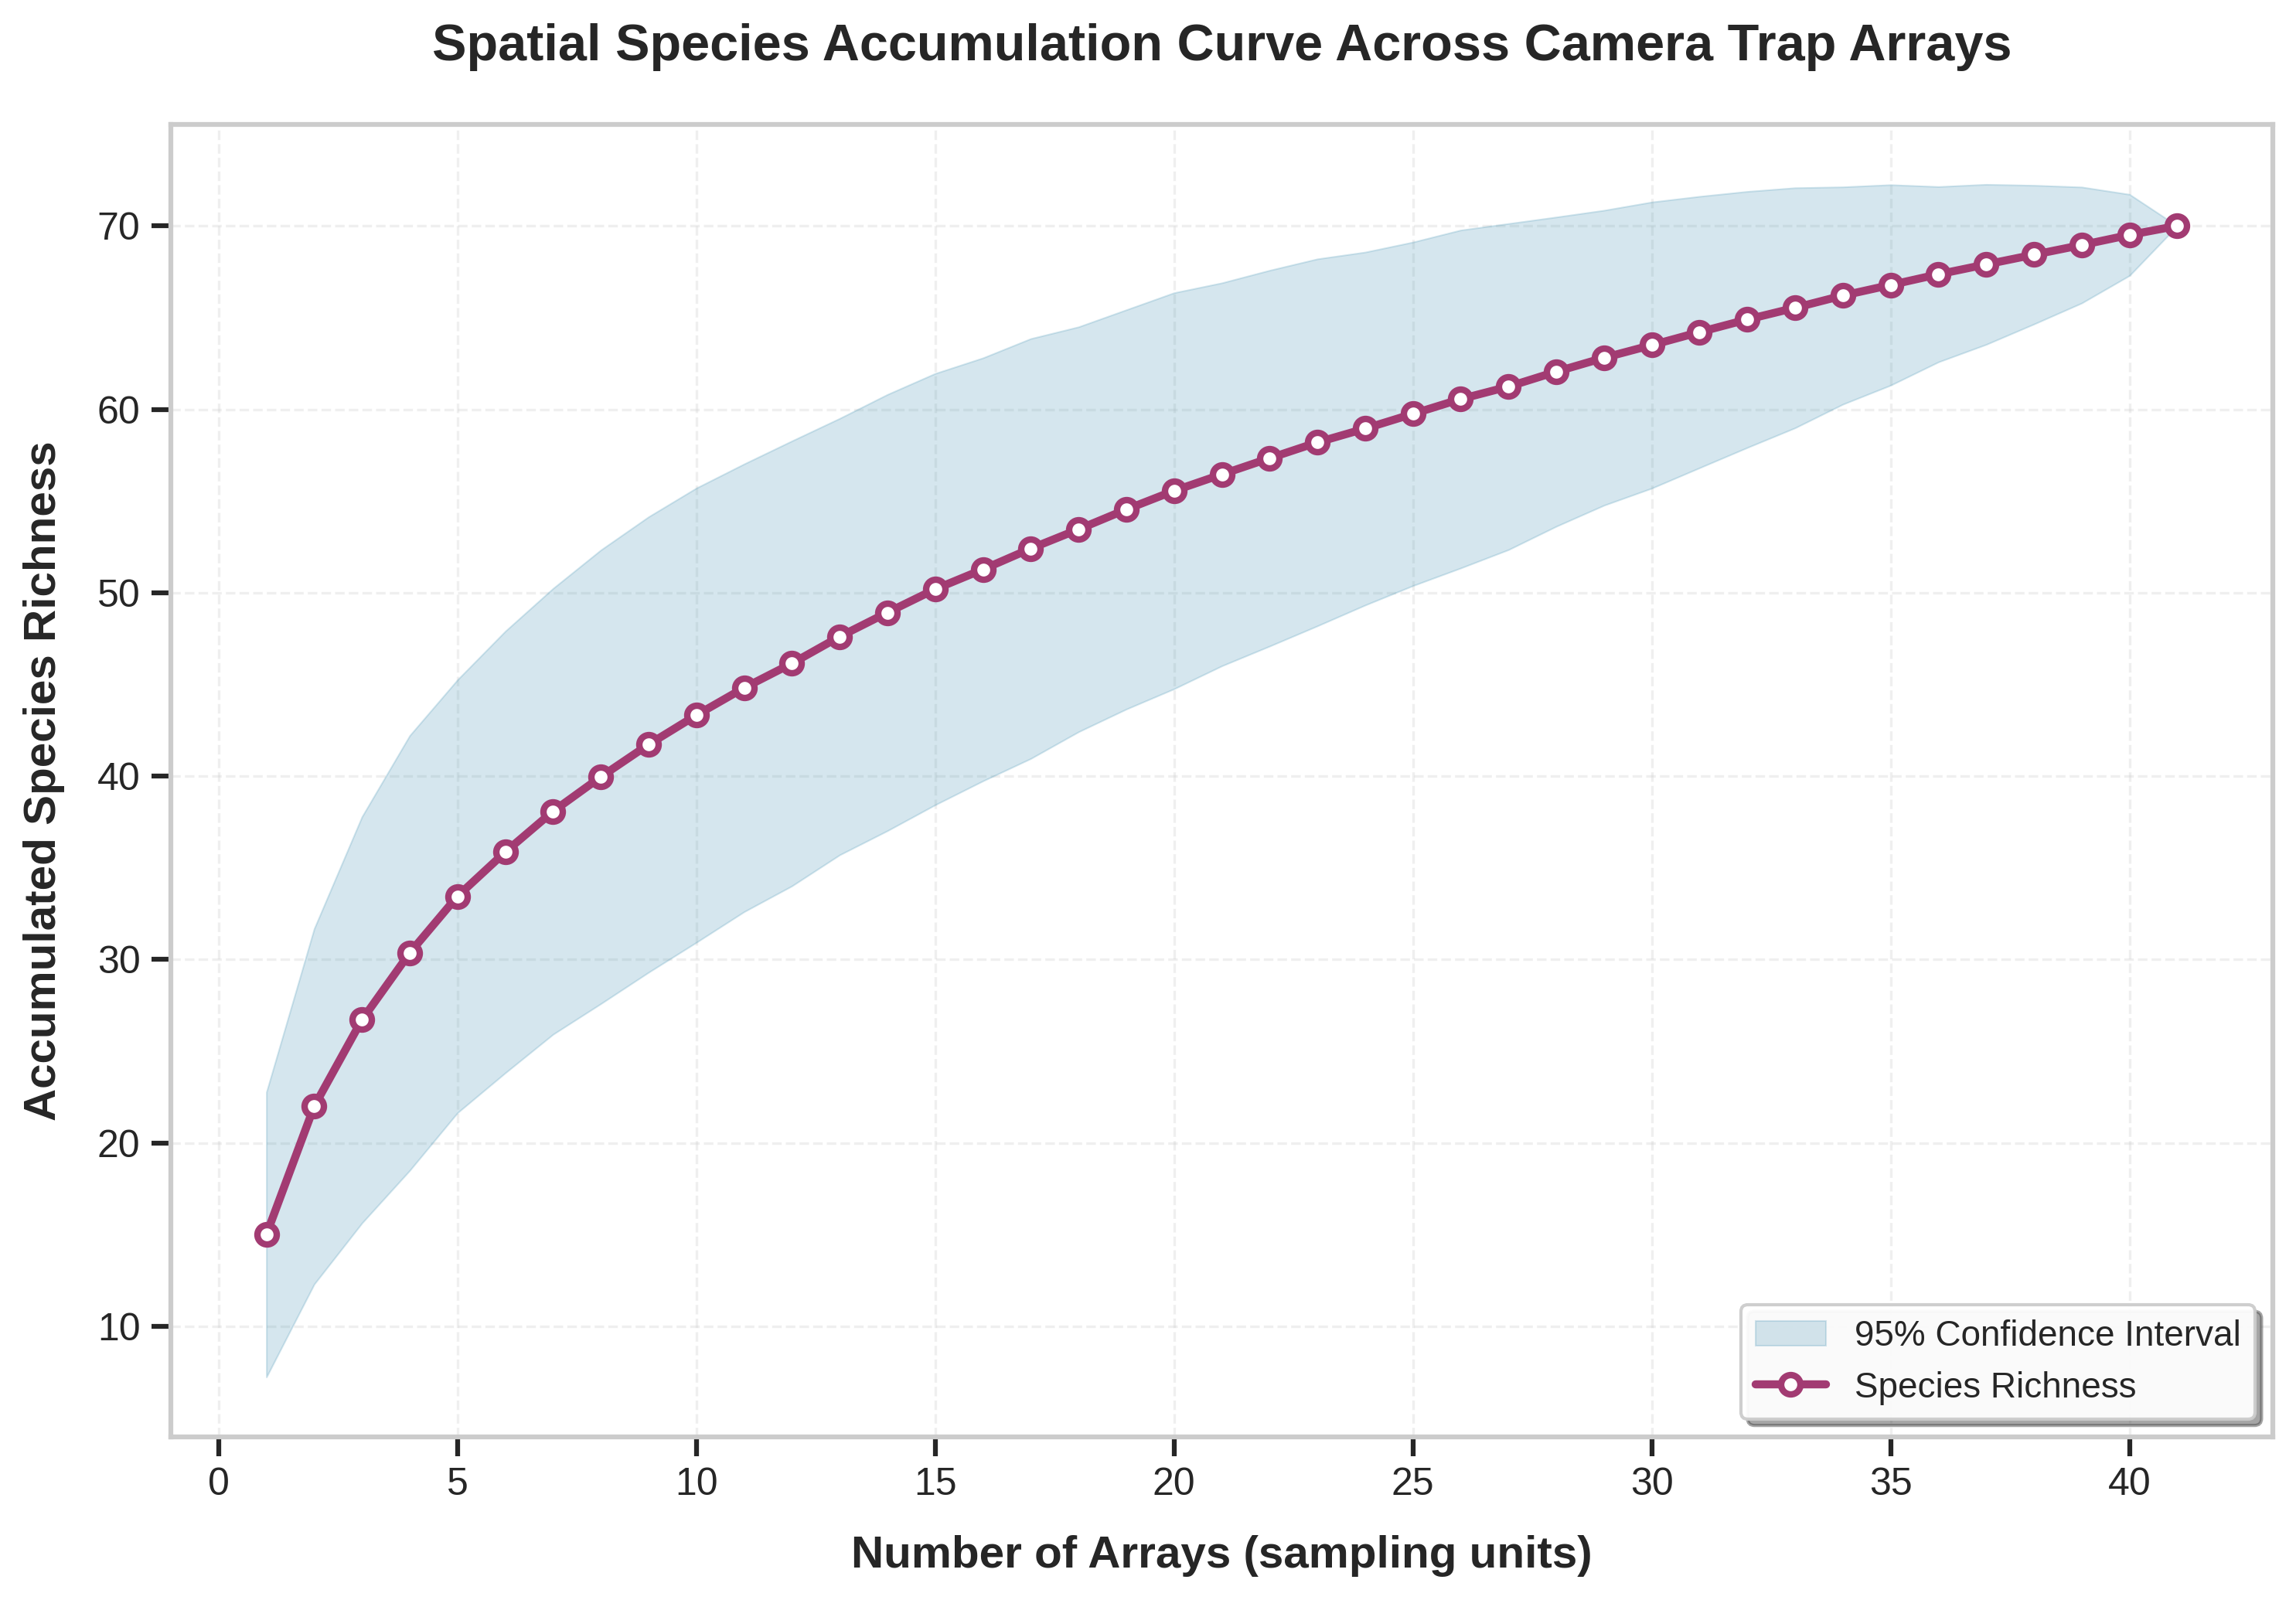


Total species richness across all arrays: 70
Number of arrays sampled: 41
Mean species per array: 14.9
Total unique species: 611


In [31]:
# Calculate Species Accumulation Curve using random method
# Each sampling unit is one camera trap array
acc_rand_array = species_accumulation(mat_array, method='random', permutations=1000)

# Plot the SAC
plot_sac(acc_rand_array,
         title="Spatial Species Accumulation Curve Across Camera Trap Arrays",
         xlabel="Number of Arrays (sampling units)")

print(f"\nTotal species richness across all arrays: {acc_rand_array['richness'][-1]:.0f}")
print(f"Number of arrays sampled: {len(acc_rand_array['sites'])}")
print(f"Mean species per array: {mat_array.sum(axis=1).mean():.1f}")
print(f"Total unique species: {mat_array.sum(axis=0).sum():.0f}")

## Spatial SAC - All Arrays (Full Dataset)
Species Accumulation Curve using ALL camera trap arrays in the dataset, regardless of monitoring duration.

In [32]:
# Check total number of unique arrays in the full dataset
all_arrays = df[df['Camera_Trap_Array'].notna()]['Camera_Trap_Array'].unique()
print(f"Total unique camera trap arrays in full dataset: {len(all_arrays)}")
print(f"First 10 arrays: {all_arrays[:10].tolist()}")

Total unique camera trap arrays in full dataset: 261
First 10 arrays: ['Crupi', 'Fantle-Lepczyk', 'Fayetteville', 'McDowell', 'Cienega', 'VermilionCliffs', 'Humboldt', 'Pepperwood', 'SierraNevada', 'SanJoaquin']


In [33]:
# Create presence/absence matrix using ALL arrays from the full dataset
mat_all_arrays = get_species_matrix(df, unit_col='Camera_Trap_Array', species_col='Sci_Name')

print(f"Matrix shape: {mat_all_arrays.shape}")
print(f"Number of arrays: {mat_all_arrays.shape[0]}")
print(f"Number of unique species: {mat_all_arrays.shape[1]}")
print(f"\nSummary statistics:")
print(f"  Mean species per array: {mat_all_arrays.sum(axis=1).mean():.1f}")
print(f"  Median species per array: {mat_all_arrays.sum(axis=1).median():.1f}")
print(f"  Min species per array: {mat_all_arrays.sum(axis=1).min()}")
print(f"  Max species per array: {mat_all_arrays.sum(axis=1).max()}")

Matrix shape: (261, 113)
Number of arrays: 261
Number of unique species: 113

Summary statistics:
  Mean species per array: 11.7
  Median species per array: 11.0
  Min species per array: 3
  Max species per array: 24


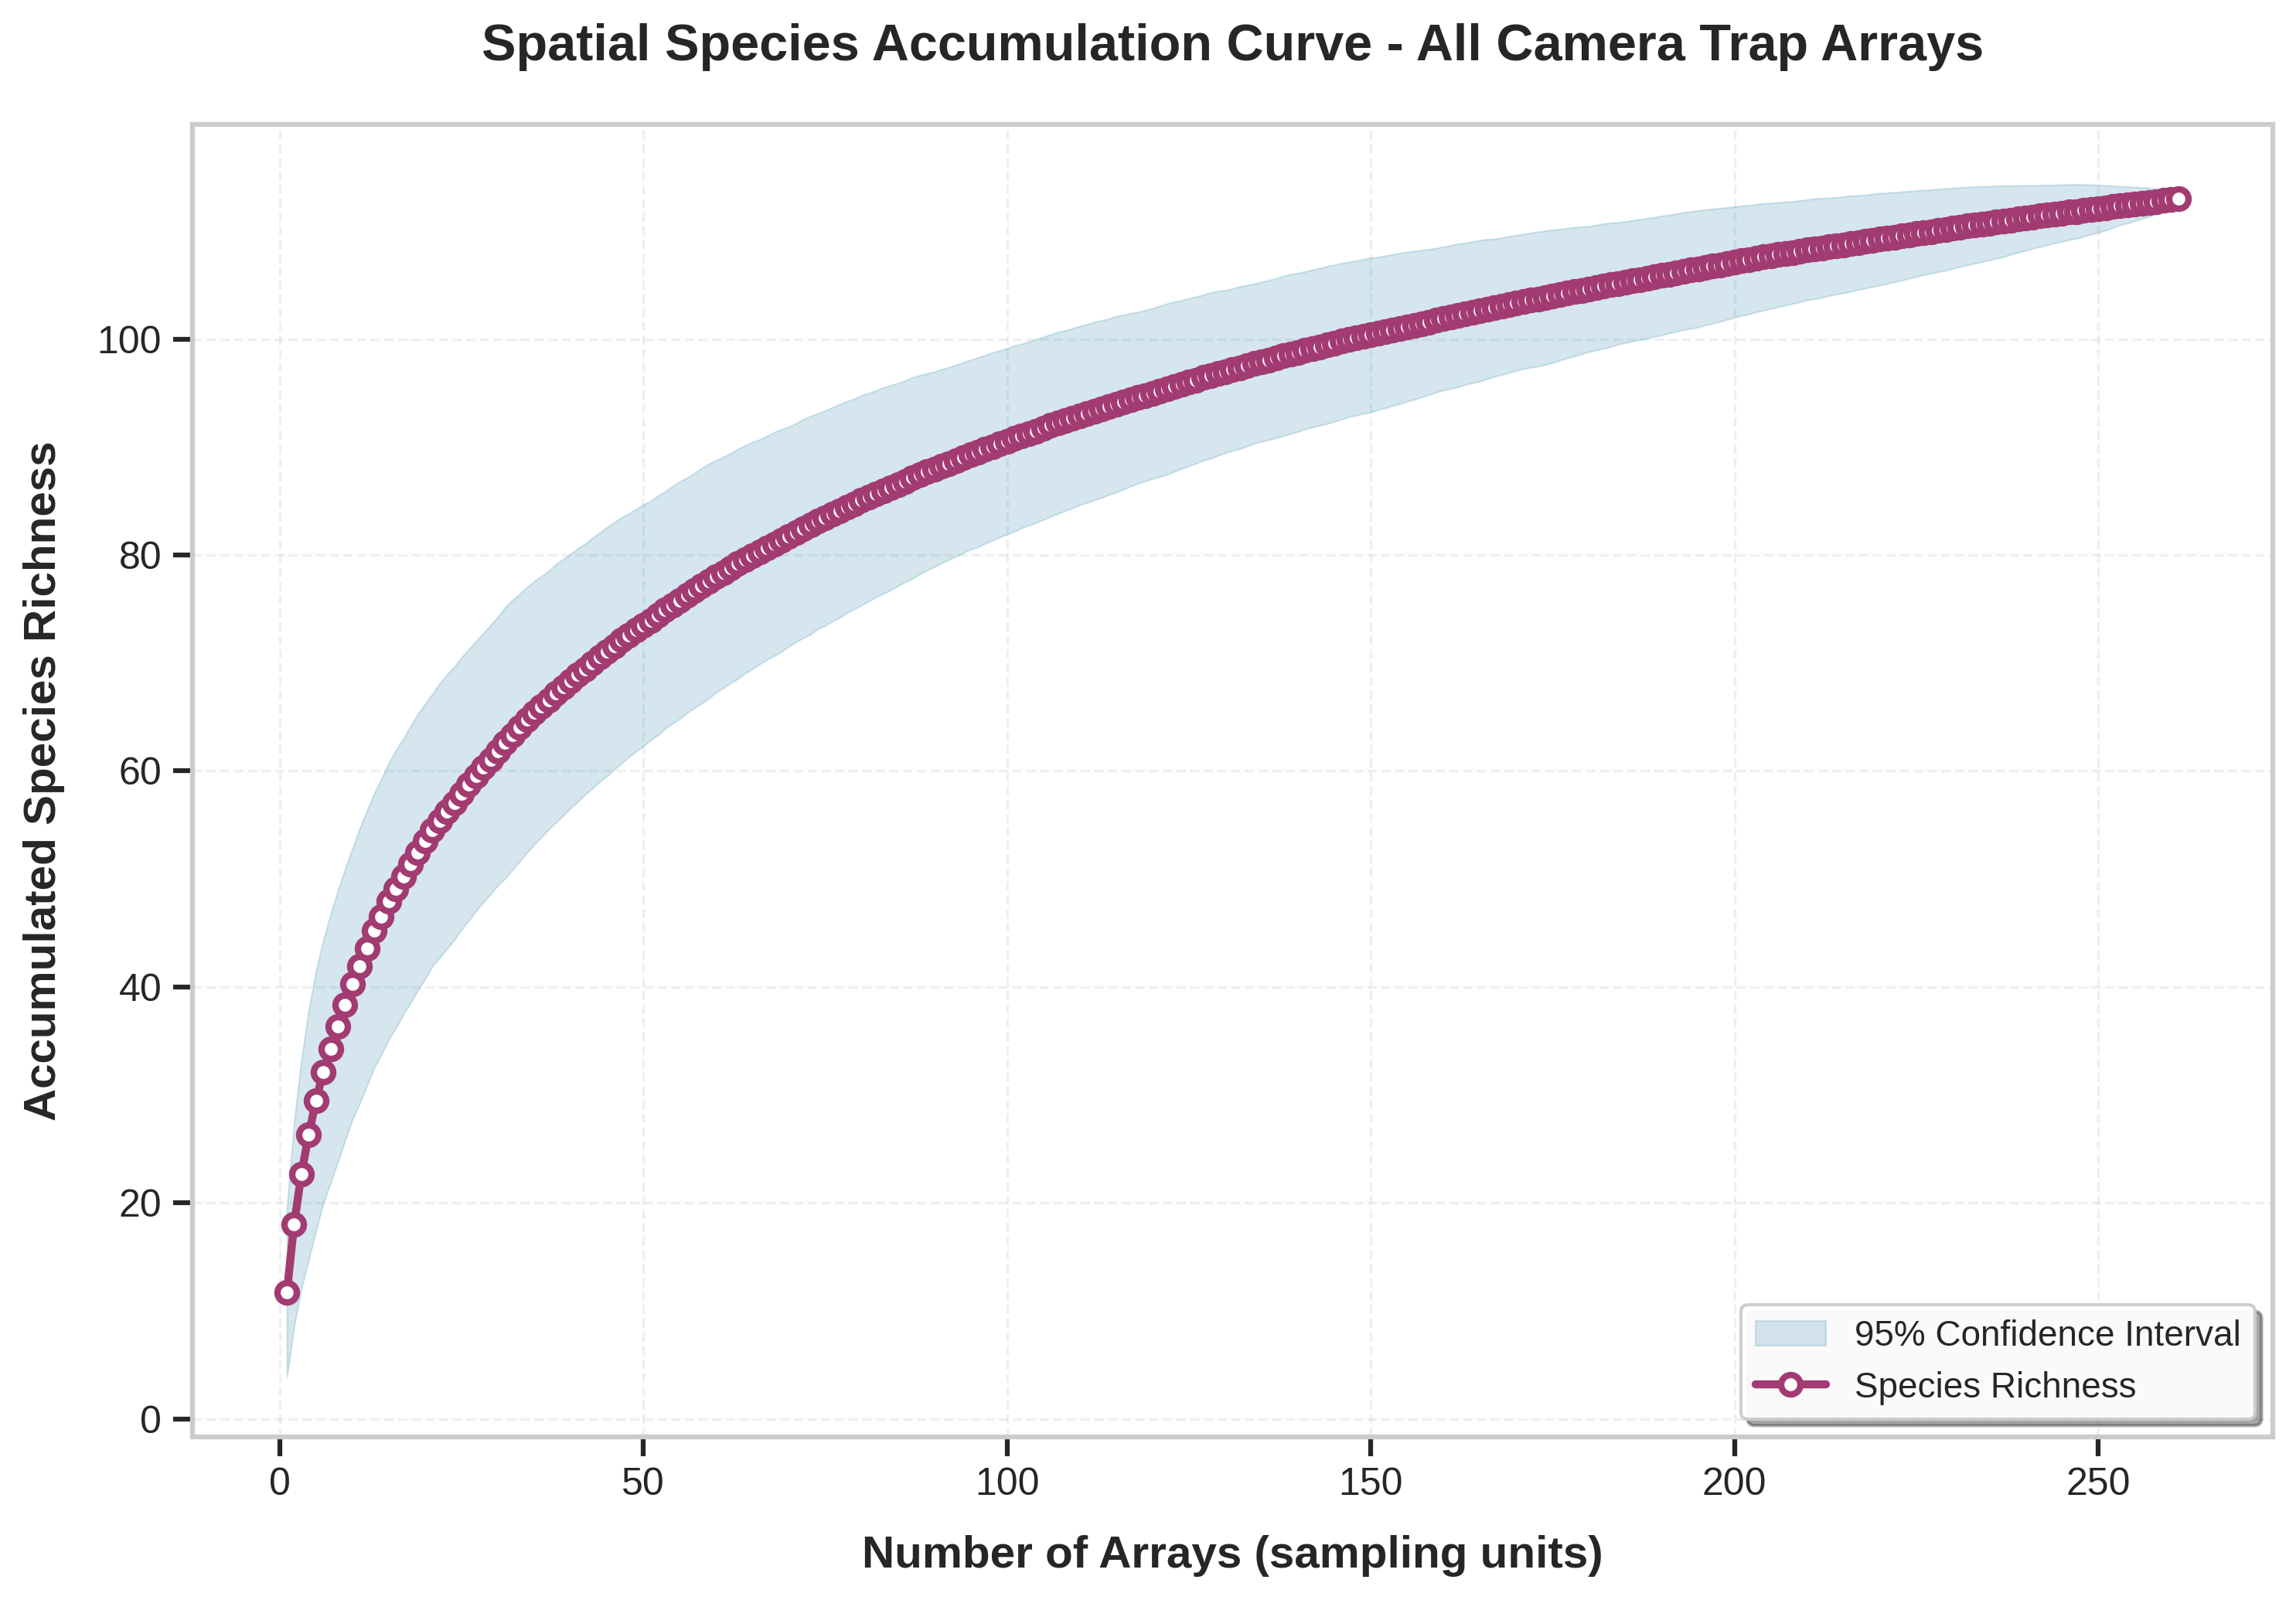


Results:
Total species richness across all arrays: 113
Number of arrays sampled: 261
Species at 50 arrays: 73.5
Species at 100 arrays: 90.5
Species at 150 arrays: 100.4
Species at 200 arrays: 107.1

Slope assessment (last 10 arrays):
Average species added per array (last 10): 0.075


In [34]:
# Calculate Species Accumulation Curve using random method for ALL arrays
acc_rand_all_arrays = species_accumulation(mat_all_arrays, method='random', permutations=1000)

# Plot the SAC
plot_sac(acc_rand_all_arrays,
         title="Spatial Species Accumulation Curve - All Camera Trap Arrays",
         xlabel="Number of Arrays (sampling units)")

print(f"\nResults:")
print(f"Total species richness across all arrays: {acc_rand_all_arrays['richness'][-1]:.0f}")
print(f"Number of arrays sampled: {len(acc_rand_all_arrays['sites'])}")
print(f"Species at 50 arrays: {acc_rand_all_arrays['richness'][49]:.1f}")
print(f"Species at 100 arrays: {acc_rand_all_arrays['richness'][99]:.1f}")
print(f"Species at 150 arrays: {acc_rand_all_arrays['richness'][149]:.1f}")
print(f"Species at 200 arrays: {acc_rand_all_arrays['richness'][199]:.1f}" if len(acc_rand_all_arrays['richness']) > 199 else "")
print(f"\nSlope assessment (last 10 arrays):")
last_10_slope = (acc_rand_all_arrays['richness'][-1] - acc_rand_all_arrays['richness'][-10]) / 10
print(f"Average species added per array (last 10): {last_10_slope:.3f}")